# Project 1: SAT & ACT Analysis

## Problem Statement

*To provide recommendation for College Board Management to increase participation rates of SAT test*

## Executive Summary

ACT and SAT are the two most popular university admission tests in the United States. While they share a lot of similarities in terms of subjects being tested and cost of taking the test, the participation rates in each state for both tests vary significantly.

As an effort to curb the growing popularity of ACT test in recent years, the College Board made some major changes in the SAT to keep it more relevant to the school curricula. To understand the impact of these changes made in 2016, we will look at the participation rate of SAT and ACT test in 2017 and 2018. Insight obtained from the analysis will be used to propose strategic recommendations to increase SAT participation rates moving forward. 


### Contents:
- [2017 Data Import and Cleaning](#2017-Data-Import-and-Cleaning)
 - [Read in SAT & ACT Data](#Read-in-SAT-&-ACT-Data)
 - [Data Preview](#Data-Preview)
 - [Data Cleaning](#Data-Cleaning)
 - [Data Wrangling](#Data-Wrangling)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
 - [Read in 2018 SAT & ACT Data](#Read-in-2018-SAT-&-ACT-Data)
 - [Data Preview (2018 data)](#Data-Preview-(2018-data))
 - [Data Wrangling (2018 data)](#Data-Wrangling-(2018-data))
 - [Combine 2017 and 2018 data](#Combine-2017-and-2018-data)
- [Exploratary Data Analysis](#Exploratory-Data-Analysis)
 - [Summary Statistics](#Summary-Statistics)
 - [Participation Rate Analysis](#Participation-Rate-Analysis)
 - [Summary of Participation Rate Analysis](#Summary-of-Participation-Rate-Analysis)
- [Visualize the data](#Visualize-the-data)
 - [Correlation Matrix](#Correlation-Matrix)
 - [Histogram](#Histogram)
 - [Scatter Plot](#Scatter-Plot)
 - [Boxplot](#Boxplot)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusion and Recommendation](#Conclusion-and-Recommendation)

*All libraries used should be added here*

In [1]:
#Imports:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from textwrap import wrap
from scipy import stats

## 2017 Data Import and Cleaning

### Read in SAT & ACT Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
sat2017file = '../data/sat_2017.csv'
sat_2017 = pd.read_csv(sat2017file)

act2017file = '../data/act_2017.csv'
act_2017 = pd.read_csv(act2017file)

### Data Preview

Some guiding questions (**question 2 to 4 will be elaborated further on the code after this markdown**):
<ol><li>Verbally Describe the Data, 
    <br>Does the data look complete? <br> 
        <ol><li> SAT 2017 data contains 51 rows and 5 columns of data
        <li> ACT 2017 data contains 52 rows and 7 columns of data
        </ol>

<br>
<li>Are there any obvious issues with the observations?

What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?
Consider comparing any questionable values to the sources of your data:
    <ol><li>[SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)<br>
        <ol>
        <li>Range for each subject in SAT test is 200-800
        <li>Total score is the summation of Math and English result with the range of 400-1600
        </ol>
    <li>[ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)
        <ol>
        <li>Range for each subject in ACT test is 1-36
        <li>Total score is the average of all subject (range of 1-36)
        </ol>
    </ol>


<li>Fix any errors you identified
<br><br>
<li>What are your data types? 

#### 2017 SAT Data Preview

There are three ways we will review the data:
<li> Check first few rows to get the sense of the individual data (.head())
<li> Check overall spreading of the data (.describe())
<li> Check datatypes of each row (.info())

In [3]:
#Code:
sat_2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [4]:
sat_2017.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


<li>Possible values for SAT 2017 per subject is between 200-800. Therefore, there is abnormalities for minimum score for 'Math'.

In [5]:
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


<li> Participation is given as a list of string despite containing numerical value within it. 

**Summary of SAT 2017 Data Preview**
<li> From .describe() it ca be observed that there is an abnormalities on Math SAT value. The possible range is 200-800, but the minimum value was 52 instead. We will take a look closer for this later on.
<li> Participation should be converted into float datatype.

#### 2017 ACT Data Preview

In [6]:
act_2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


In [7]:
act_2017.describe()

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


Similarly, on ACT 2017 value, the minimum value of Science subject is significantly lower than other subjects. Therefore, we will take a look at this for some sanity check. 

In [8]:
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


**Summary of ACT 2017 Data Preview**
<li>From .describe(), it can be observed that there is an abnormalities on Science SAT value. The possible range is 200-800, but the minimum value was 52 instead. We will take a look closer for this later on.
<li>From .info(), it can be observed that the column 'Composite' and 'Participation' is of string datatype despite containing numeric values. 

### Data Cleaning

Based on the data preview above, there are a few action items to perform to clean the data:
    <ol>
    <li> [Check for outlier score in SAT 2017 file on Math subject](#Check-for-outlier-score-in-SAT-2017-file-on-Math-subject)
    <li> [Check for outlier score in ACT 2017 file on Science subject](#Check-for-outlier-score-in-ACT-2017-file-on-Science-subject)
    <li> [Convert 'Composite' column into numeric type](#Convert-'Composite'-column-into-numeric-type)
    <li> [Convert 'Participation' column into numeric type](#Convert-'Participation'-column-into-numeric-type)
    </ol>
    
Point no 4 will be covered in [Data Wrangling](#Data-Wrangling) section subsequently

#### Check for outlier in SAT 2017 file on Math subject

In [9]:
# Show all values in SAT 2017 Math to see any abnormal values. 
np.array(sorted(sat_2017['Math'].unique()))

array([ 52, 468, 492, 493, 495, 497, 499, 507, 512, 515, 517, 520, 521,
       523, 524, 526, 528, 531, 532, 533, 534, 535, 541, 548, 551, 553,
       556, 561, 570, 572, 586, 591, 594, 595, 603, 604, 607, 614, 616,
       621, 625, 628, 631, 635, 649, 651])

There seems to be one no other outlier value other than 52. Lets zoom in to the data.

In [10]:
sat_2017[sat_2017['Math'] == 52]

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,52,1060


Maryland seems to have a wrong 'Math' score. As 'Math' score can be computed from the other columns we will impute its value to the correct value accordingly.

In [11]:
# Impute Math value on Maryland entry
sat_2017.at[20,'Math'] = sat_2017.loc[20,'Total'] - sat_2017.loc[20,'Evidence-Based Reading and Writing']
print("The correct SAT 2017 score for Math in Maryland is: {}".format(sat_2017.loc[20,'Math']))

The correct SAT 2017 score for Math in Maryland is: 524


#### Check for outlier in ACT 2017 file on Science subject

In [12]:
# Show all values in SAT 2017 Math to see any abnormal values. 
np.array(sorted(act_2017['Science'].unique()))

array([ 2.3, 18.2, 18.8, 18.9, 19.3, 19.4, 19.5, 19.6, 19.8, 19.9, 20. ,
       20.1, 20.5, 20.6, 20.9, 21. , 21.3, 21.5, 21.6, 21.7, 22. , 22.1,
       22.2, 22.3, 23.2, 23.3, 23.4, 23.5, 23.6, 23.7, 23.8, 23.9, 24.6,
       24.7, 24.9])

There seem to be one outlier value which is 2.3. Lets zoom in to the data.

In [13]:
act_2017[act_2017['Science'] == 2.3]

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,2.3,23.6


Similarly as above, 'Science' score value can be derived from the 'Composite' score. However, as the 'Composite' score is shown as the average of each subjects, we will multiply the value by 4. 

In [14]:
act_2017.at[21,'Science'] = round(4*float(act_2017.loc[21,'Composite']) - (act_2017.loc[21,'English'] + act_2017.loc[21,'Math'] + act_2017.loc[21,'Reading']),2)
print("The correct ACT 2017 score for Science in Maryland is: {}".format(act_2017.loc[21,'Science']))

The correct ACT 2017 score for Science in Maryland is: 23.8


#### Convert 'Composite' column on ACT 2017 file into numeric type

In [15]:
# act_2017['Composite_num'] = act_2017['Composite'].map(lambda x: float(x))

# Result:
# ValueError: could not convert string to float: '20.2x'

**Steps Taken**
<ul><li>An attempt to convert the 'Composite' column to be a numeric value (using the code shown above) has failed as one of the value is non-numeric datatype, i.e. '20.2x'. This is likely due to wrong input during data entry process.
<li>To find out the best way to solve this issue, will find out the number of non-numeric data entries.

In [16]:
count = 0
for entry in act_2017['Composite']:
    integer, decimal = entry.split('.')
    if integer.isdigit() & decimal.isdigit():
        next
    else:
        count+=1
print("The number of non-numeric 'Composite' entry: {}".format(count))

The number of non-numeric 'Composite' entry: 1


<ul><li>Since there is only one non-numeric value, we are able to check the non-numeric value individually. As the value is '20.2x' we are able to assume that it was a typo during data entry and hence, impute it with the most likely value of 20.2.

In [17]:
act_2017['Composite'].replace('20.2x','20.2',inplace=True)
act_2017['Composite'] = act_2017['Composite'].map(lambda x: float(x))

In [18]:
#code
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [19]:
#code
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     float64
dtypes: float64(5), object(2)
memory usage: 3.0+ KB


### Data Wrangling

Apart from cleaning the data, the data needs to be converted into format that is suitable for analysis later on. A few steps to be done:
    <ol>
    <li>[Convert 'Participation' column into numeric type](#Convert-'Participation'-column-into-numeric-type)
    <li> [Rename columns](#Rename-columns)
    <li> [Create a data dictionary](#Create-a-data-dictionary)
    <li> [Drop unnecessary rows](#Drop-unnecessary-rows)
    <li> [Merge dataframes with 2018 data](#Merge-dataframes-with-2018-data)

#### Convert 'Participation' column into numeric type

In [20]:
# this function will convert % value of participation rate into decimal value. 
def convert_to_numeric(df, column_name):
    df[column_name] = df[column_name].str.replace("%$","",regex=True).map(lambda x: float(x)/100)

In [21]:
# convert the column 'Participation' from both datasets into numeric data type
convert_to_numeric(act_2017,'Participation')
convert_to_numeric(sat_2017,'Participation')

<li>Show the data types of each files after conversion

In [22]:
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   State                               51 non-null     object 
 1   Participation                       51 non-null     float64
 2   Evidence-Based Reading and Writing  51 non-null     int64  
 3   Math                                51 non-null     int64  
 4   Total                               51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


In [23]:
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     float64
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     float64
dtypes: float64(6), object(1)
memory usage: 3.0+ KB


<li> Display the data again to confirm they are correct.

In [24]:
sat_2017.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,0.05,593,572,1165
1,Alaska,0.38,547,533,1080
2,Arizona,0.30,563,553,1116
3,Arkansas,0.03,614,594,1208
4,California,0.53,531,524,1055


In [25]:
act_2017.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,0.60,20.3,20.7,21.4,21.0,21.0
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4


#### Rename columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [26]:
# Let's preview column names for each file first
sat_2017.columns

Index(['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math',
       'Total'],
      dtype='object')

In [27]:
act_2017.columns

Index(['State', 'Participation', 'English', 'Math', 'Reading', 'Science',
       'Composite'],
      dtype='object')

In [28]:
# Create a function to change the column names according to the guideliens
def column_name_changer(df,file_name,year):
    dict_name = {column:(column.replace(" ","_").lower() + "_" + file_name + "_" + str(year) ) for column in df.columns if column.lower()!='state'}
    dict_name['State'] = 'state'
    df.rename(columns=dict_name,inplace=True)
    return dict_name

On top of the change done by the column_name_changer above, "Evidence-Based Reading and Writing" will be amended into "Read/Write" for brevity.

In [29]:
sat_2017.rename(columns={"Evidence-Based Reading and Writing":"Read/Write"},inplace=True);

In [30]:
# Change column names
sat_data_dict = column_name_changer(sat_2017,'sat',2017)
act_data_dict = column_name_changer(act_2017,'act',2017)

In [31]:
sat_2017.columns

Index(['state', 'participation_sat_2017', 'read/write_sat_2017',
       'math_sat_2017', 'total_sat_2017'],
      dtype='object')

In [32]:
act_2017.columns

Index(['state', 'participation_act_2017', 'english_act_2017', 'math_act_2017',
       'reading_act_2017', 'science_act_2017', 'composite_act_2017'],
      dtype='object')

#### Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|SAT|The state where the data is from| 
|participation_sat_2017|float|SAT|Participation rate within the state (given in decimal ranging between 0-1)<br> < 0 corresponds to no participation and 1 corresponds to total participation >| 
|read/write_sat_2017|int|SAT|Average Reading and Writing subject score between 200-800 (given as integers) <br> < higher value corresponds to better result >| 
|math_sat_2017|int|SAT|Average Math subject score between 200-800 (given as integers) <br> < higher value corresponds to better result >|| 
|total_sat_2017|int|SAT|Total score between 400-1600 (given as integers) <br> < higher value corresponds to better result >|| 



|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|ACT|The state where the data is from| 
|participation_act_2017|float|ACT|Participation rate within the state (given in decimal ranging between 0-1)<br> < 0 corresponds to no participation and 1 corresponds to total participation >| 
|english_act_2017|float|ACT|Average English subject score between 1-36 (given as decimals) <br> < higher value corresponds to better result >| 
|math_act_2017|float|ACT|Average Math subject score between 1-36 (given as decimals) <br> < higher value corresponds to better result >| 
|reading_act_2017|float|ACT|Average Reading subject score between 1-36 (given as decimals) <br> < higher value corresponds to better result >| 
|science_act_2017|float|ACT|Average Science subject score between 1-36 (given as decimals) <br> < higher value corresponds to better result >| 
|composite_act_2017|float|ACT|Average score of all subjects, ranging between 1-36 (given as decimals) <br> < higher value corresponds to better result >| 

#### Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [33]:
#code
sat_2017['state'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [34]:
act_2017['state'].unique()

array(['National', 'Alabama', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

<li>act_2017 contains 'National' entry which is not present in sat_2017 data. Therefore, the entry will be removed. 

In [35]:
# Removing 'National' row in ACT 2017 data
act_2017=act_2017[act_2017['state']!='National']

#### Merge SAT and ACT 2017 data

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [36]:
#Code:
combined_2017 = pd.merge(sat_2017,act_2017,how='inner',on='state')
combined_2017.head()

,state,participation_sat_2017,read/write_sat_2017,math_sat_2017,total_sat_2017,participation_act_2017,english_act_2017,math_act_2017,reading_act_2017,science_act_2017,composite_act_2017
0,Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2
1,Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,19.8
2,Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,19.4
4,California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,22.8


#### Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [37]:
#code
combined_2017.to_csv('combined_2017.csv')

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

### Read in 2018 SAT & ACT Data

In [38]:
sat_2018 = pd.read_csv('../data/sat_2018.csv')

act_2018 = pd.read_csv('../data/act_2018_updated.csv')

### Data Preview (2018 data)

Similar to the 2017 data, there are three ways we will review the data:
<li> Check first few rows to get the sense of the individual data (.head())
<li> Check overall spreading of the data (.describe())
<li> Check datatypes of each row (.info())

#### 2018 SAT Data Preview

In [39]:
sat_2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [40]:
sat_2018.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,563.686275,556.235294,1120.019608
std,47.502627,47.772623,94.155083
min,480.000000,480.000000,977.000000
25%,534.500000,522.500000,1057.500000
50%,552.000000,544.000000,1098.000000
75%,610.500000,593.500000,1204.000000
max,643.000000,655.000000,1298.000000


In [41]:
sat_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


**Summary of SAT 2018 Data Preview**
<li> From .info(), it can be observed that Participation is also given in 'object' file, therefore, we should convert them into numerical datatype.
<li> Column names will be converted to be in the same format as 2017 data. 

#### 2018 ACT Data Preview

In [42]:
act_2018.head()

,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
0,Alabama,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4
4,California,27,22.7,22.5,22.5,23.0,22.1


In [43]:
act_2018.describe()

,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,61.647059,21.486275,20.988235,21.125490,22.015686,21.345098
std,34.080976,2.106278,2.446356,2.035765,2.167245,1.870114
min,7.000000,17.700000,16.600000,17.800000,18.000000,17.900000
25%,28.500000,19.950000,19.100000,19.400000,20.450000,19.850000
50%,66.000000,21.300000,20.200000,20.700000,21.600000,21.100000
75%,100.000000,23.550000,23.700000,23.150000,24.100000,23.050000
max,100.000000,25.600000,26.000000,25.200000,26.100000,24.900000


In [44]:
act_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          51 non-null     object 
 1   Percentage of Students Tested  51 non-null     int64  
 2   Average Composite Score        51 non-null     float64
 3   Average English Score          51 non-null     float64
 4   Average Math Score             51 non-null     float64
 5   Average Reading Score          51 non-null     float64
 6   Average Science Score          51 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.9+ KB


<li>To make it consistent with the rest of the data, 'Percentage of Student Tested' data will be convert into float datatype. 

**Summary of ACT 2018 Data Preview**
<li> From .info(), it can be observed that Participation is also given in percentage point of integer data type. To ensure consistency, we should convert them into decimal value and float datatype.
<li> Naming of the column are not consistent with 2017 Data and will be converted accordingly.

### Data Wrangling (2018 data)

Based on the 2018 data preview above, there are a few action items to perform to clean the data:
    <ol>
    <li> [Convert SAT 2018 'Participation' column into numerical value](#Convert-'Participation'-column-of-SAT-2018-data-into-numerical-value)
    <li> [Convert SAT 2018 column naming to make it consistent with 2017 data](#Convert-SAT-2018-column-naming-to-make-it-consistent-with-2017-data)
    <li>[Convert ACT 2018 column naming to make it consistent with 2017 data](#Convert-ACT-2018-column-naming-to-make-it-consistent-with-2017-data) 
    <li>[Convert ACT 2018 'Participation' column into decimal value](#Convert-ACT-2018-'Participation'-column-into-decimal-value)
    </ol>

#### Convert SAT 2018 'Participation' column into numerical value

In [45]:
# To convert column 'Participation' on sat_2018 dataframe into equivalent numeric value
convert_to_numeric(sat_2018,'Participation')

In [46]:
# Check for data conversion
sat_2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,0.06,595,571,1166
1,Alaska,0.43,562,544,1106
2,Arizona,0.29,577,572,1149
3,Arkansas,0.05,592,576,1169
4,California,0.60,540,536,1076


#### Convert SAT 2018 column naming to make it consistent with 2017 data

Convert column names to follow the guidelines:
<li>All lower case letter.
<li>No special character in the title. Space is replaced with '_'.
<li>Add column details to include information about whether the data is from act or sat data and the year it was originated.

In [47]:
# Change subject name to be consistent with 2017 data
sat_2018.rename(columns={"Evidence-Based Reading and Writing":"Read/Write"},inplace=True);

In [48]:
# Rename the columns based on the criteria above
column_name_changer(sat_2018,'sat',2018);

In [49]:
sat_2018.columns

Index(['state', 'participation_sat_2018', 'read/write_sat_2018',
       'math_sat_2018', 'total_sat_2018'],
      dtype='object')

#### Convert ACT 2018 column naming to make it consistent with 2017 data

In [50]:
act_2018.rename(columns={
    'State':'state'
    ,'Percentage of Students Tested':'participation_act_2018'
    ,'Average Composite Score':'composite_act_2018'
    ,'Average English Score':'english_act_2018'
    ,'Average Math Score':'math_act_2018'
    ,'Average Reading Score':'reading_act_2018'
    ,'Average Science Score':'science_act_2018'
}, inplace=True)

In [51]:
act_2018.columns

Index(['state', 'participation_act_2018', 'composite_act_2018',
       'english_act_2018', 'math_act_2018', 'reading_act_2018',
       'science_act_2018'],
      dtype='object')

#### Convert ACT 2018 'Participation' column into decimal value

In [52]:
act_2018['participation_act_2018'] = act_2018['participation_act_2018'].map(lambda x: float(x)/100)

In [53]:
# Check for conversion result
act_2018.head()

,state,participation_act_2018,composite_act_2018,english_act_2018,math_act_2018,reading_act_2018,science_act_2018
0,Alabama,1.00,19.1,18.9,18.3,19.6,19.0
1,Alaska,0.33,20.8,19.8,20.6,21.6,20.7
2,Arizona,0.66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,1.00,19.4,19.1,18.9,19.7,19.4
4,California,0.27,22.7,22.5,22.5,23.0,22.1


#### Merge SAT and ACT 2018 data

In [54]:
combined_2018 = pd.merge(sat_2018, act_2018, how='inner',on='state')
combined_2018.head()

,state,participation_sat_2018,read/write_sat_2018,math_sat_2018,total_sat_2018,participation_act_2018,composite_act_2018,english_act_2018,math_act_2018,reading_act_2018,science_act_2018
0,Alabama,0.06,595,571,1166,1.00,19.1,18.9,18.3,19.6,19.0
1,Alaska,0.43,562,544,1106,0.33,20.8,19.8,20.6,21.6,20.7
2,Arizona,0.29,577,572,1149,0.66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,0.05,592,576,1169,1.00,19.4,19.1,18.9,19.7,19.4
4,California,0.60,540,536,1076,0.27,22.7,22.5,22.5,23.0,22.1


### Combine 2017 and 2018 data
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [55]:
final = pd.merge(combined_2017, combined_2018, how='inner', on='state')

In [56]:
# Save the new data into csv file
final.to_csv('final.csv')

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [58]:
final.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
participation_sat_2017,51.0,0.398039,0.352766,0.02,0.040,0.38,0.660,1.0
read/write_sat_2017,51.0,569.117647,45.666901,482.00,533.500,559.00,613.000,644.0
math_sat_2017,51.0,556.882353,47.121395,468.00,523.500,548.00,599.000,651.0
total_sat_2017,51.0,1126.098039,92.494812,950.00,1055.500,1107.00,1212.000,1295.0
participation_act_2017,51.0,0.652549,0.321408,0.08,0.310,0.69,1.000,1.0
english_act_2017,51.0,20.931373,2.353677,16.30,19.000,20.70,23.300,25.5
math_act_2017,51.0,21.182353,1.981989,18.00,19.400,20.90,23.100,25.3
reading_act_2017,51.0,22.013725,2.067271,18.10,20.450,21.80,24.150,26.0
science_act_2017,51.0,21.462745,1.753392,18.20,19.950,21.30,23.200,24.9
composite_act_2017,51.0,21.519608,2.020695,17.80,19.800,21.40,23.600,25.5


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [59]:
#code
def std_dev(df, column_name):
    n = len(df)
    mean = df[column_name].mean(axis=0)
    deviation_2 = 0
    for i in range(n):
        deviation_2 += (mean-df[column_name][i])**2
    return (deviation_2/n)**(0.5)     

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [60]:
# Create dictionary comprehension using manual computation
sd = {column:round(std_dev(final,column),3) for column in final.columns if ((final[column].dtype == 'int64') | (final[column].dtype == 'float64'))}
sd

{'participation_sat_2017': 0.349,
 'read/write_sat_2017': 45.217,
 'math_sat_2017': 46.657,
 'total_sat_2017': 91.584,
 'participation_act_2017': 0.318,
 'english_act_2017': 2.33,
 'math_act_2017': 1.962,
 'reading_act_2017': 2.047,
 'science_act_2017': 1.736,
 'composite_act_2017': 2.001,
 'participation_sat_2018': 0.369,
 'read/write_sat_2018': 47.035,
 'math_sat_2018': 47.302,
 'total_sat_2018': 93.227,
 'participation_act_2018': 0.337,
 'composite_act_2018': 2.086,
 'english_act_2018': 2.422,
 'math_act_2018': 2.016,
 'reading_act_2018': 2.146,
 'science_act_2018': 1.852}

In [61]:
# Create dictionary comprehension using numpy method
sd_np = {column:round(np.std(final[column]),3) for column in final.columns if ((final[column].dtype == 'int64') | (final[column].dtype == 'float64'))}
sd_np

{'participation_sat_2017': 0.349,
 'read/write_sat_2017': 45.217,
 'math_sat_2017': 46.657,
 'total_sat_2017': 91.584,
 'participation_act_2017': 0.318,
 'english_act_2017': 2.33,
 'math_act_2017': 1.962,
 'reading_act_2017': 2.047,
 'science_act_2017': 1.736,
 'composite_act_2017': 2.001,
 'participation_sat_2018': 0.369,
 'read/write_sat_2018': 47.035,
 'math_sat_2018': 47.302,
 'total_sat_2018': 93.227,
 'participation_act_2018': 0.337,
 'composite_act_2018': 2.086,
 'english_act_2018': 2.422,
 'math_act_2018': 2.016,
 'reading_act_2018': 2.146,
 'science_act_2018': 1.852}

In [62]:
round(final.describe().loc['std',:],3)

participation_sat_2017     0.353
read/write_sat_2017       45.667
math_sat_2017             47.121
total_sat_2017            92.495
participation_act_2017     0.321
english_act_2017           2.354
math_act_2017              1.982
reading_act_2017           2.067
science_act_2017           1.753
composite_act_2017         2.021
participation_sat_2018     0.373
read/write_sat_2018       47.503
math_sat_2018             47.773
total_sat_2018            94.155
participation_act_2018     0.341
composite_act_2018         2.106
english_act_2018           2.446
math_act_2018              2.036
reading_act_2018           2.167
science_act_2018           1.870
Name: std, dtype: float64

**Question and Answer:**
<li> Is standard deviation computed using manual, pandas and numpy approach results in different answer?<br>
    The manual calculation does not match up the output from pandas describe. However, the manual calculation matches up with numpy std method. This is because, numpy and our manual calculation uses standard deviation of underlying data with no DDoF (Delta Degree of Freedom). However, pandas describe method uses DDoF = 1 to account for Bessel's correction to accommodate error introduced by sampling method instead of the underlying data.

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

### Participation Rate Analysis

*Note that my analysis is not in order of question asked above*

To allow easier comparison between different tests, **summary matrix below will be presented in the format below:**

|state|participation_sat_2017|state|participation_sat_2018|state|participation_act_2017|state|participation_act_2018|
|---|---|---|---|---|---|---|---|
|state with participation rate for sat 2017 within the theshold|Its corresponding sat 2017 participation rate|state with participation rate for sat 2018 within the theshold|Its corresponding sat 2018 participation rate|state with participation rate for act 2017 within the theshold|Its corresponding act 2017 participation rate|state with participation rate for act 2018 within the theshold|Its corresponding act 2018 participation rate|

In [64]:
# 100% participation rate for both test in 2017 and 2018
print('Summary Matrix for 100 Percent Participation')
part_rate = 1
pr_100_summary = {
    'pr_100_sat_2017' : final[final['participation_sat_2017']>=part_rate][['state','participation_sat_2017']].reset_index().drop(columns='index').sort_values(by='state'),
    'pr_100_sat_2018' : final[final['participation_sat_2018']>=part_rate][['state','participation_sat_2018']].reset_index().drop(columns='index').sort_values(by='state'),
    'pr_100_act_2017' : final[final['participation_act_2017']>=part_rate][['state','participation_act_2017']].reset_index().drop(columns='index').sort_values(by='state'),
    'pr_100_act_2018' : final[final['participation_act_2018']>=part_rate][['state','participation_act_2018']].reset_index().drop(columns='index').sort_values(by='state')
}
df_pr_100_summary = pd.concat([value for key, value in pr_100_summary.items()],axis=1)
df_pr_100_summary

Summary Matrix for 100 Percent Participation


,state,participation_sat_2017,state,participation_sat_2018,state,participation_act_2017,state,participation_act_2018
0,Connecticut,1.0,Colorado,1.0,Alabama,1.0,Alabama,1.0
1,Delaware,1.0,Connecticut,1.0,Arkansas,1.0,Arkansas,1.0
2,District of Columbia,1.0,Delaware,1.0,Colorado,1.0,Kentucky,1.0
3,Michigan,1.0,Idaho,1.0,Kentucky,1.0,Louisiana,1.0
4,NaN,NaN,Michigan,1.0,Louisiana,1.0,Mississippi,1.0
5,NaN,NaN,NaN,NaN,Minnesota,1.0,Missouri,1.0
6,NaN,NaN,NaN,NaN,Mississippi,1.0,Montana,1.0
7,NaN,NaN,NaN,NaN,Missouri,1.0,Nebraska,1.0
8,NaN,NaN,NaN,NaN,Montana,1.0,Nevada,1.0
9,NaN,NaN,NaN,NaN,Nevada,1.0,North Carolina,1.0


**Analysis:**
- There are 4 or less states with full participation rate on SAT while there are 17 states with full particiation rate on ACT. Based on 2017-2018 [data](https://www.testive.com/state-sat-act/), most of the states with full participation on ACT is required to take it by the states.
- SAT is also compulsory by the state on 11 states. However, only 4 of them have 100% participation. Let's zoom in further on the states with compulsory SAT requirement.

In [65]:
# Based on data obtained in 2018, these are the state that requires ACT and SAT, accordingly.
# Data is obtained from: https://www.testive.com/state-sat-act/
act_required = ['Alabama', 'Hawaii', 'Idaho', 'Kentucky', 'Louisiana', 'Mississippi', 'Missouri', 
                'Montana', 'Nebraska', 'Nevada', 'North Carolina', 'North Dakota', 'Ohio',
                'South Carolina', 'Tennessee', 'Utah', 'Wisconsin', 'Wyoming']
sat_required = ['Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Idaho',
                'Illinois', 'Maine', 'Michigan', 'New Hampshire', 'Ohio', 'Tennessee']

In [66]:
print("List of states with state-administered SAT test:")
final[(final['state'].isin(sat_required))][['state',
                                            'participation_sat_2017',
                                            'participation_sat_2018',
                                            'participation_act_2017',
                                            'participation_act_2018']
                                          ].sort_values(by=['participation_sat_2017',
                                                            'participation_sat_2018'], ascending=False)

List of states with state-administered SAT test:


,state,participation_sat_2017,participation_sat_2018,participation_act_2017,participation_act_2018
6,Connecticut,1.00,1.00,0.31,0.26
7,Delaware,1.00,1.00,0.18,0.17
22,Michigan,1.00,1.00,0.29,0.22
8,District of Columbia,1.00,0.92,0.32,0.32
29,New Hampshire,0.96,0.96,0.18,0.16
19,Maine,0.95,0.99,0.08,0.07
12,Idaho,0.93,1.00,0.38,0.36
35,Ohio,0.12,0.18,0.75,1.00
5,Colorado,0.11,1.00,1.00,0.30
13,Illinois,0.09,0.99,0.93,0.43


In [67]:
def test_req(state,sat_required,act_required):
    if (state in sat_required) & (state in act_required):
        return 'Both tests required'
    elif state in sat_required:
        return 'SAT required'
    elif state in act_required:
        return 'ACT required'
    else:
        return 'No state requirement'

In [68]:
final['test_requirement'] = final.apply(lambda x: test_req(x['state'],sat_required,act_required),axis=1)

**Analysis**
- Illinois, as one of the state administering SAT test beginning in [2016-2017](https://blog.prepscholar.com/which-states-require-the-sat), saw a jump of SAT participation rate from merely 9% in 2017 to 99% in 2018. Likewise, Colorado saw a jump from 11% to 100% participation rate in 2017 to 2018. This is due to a state requirement to take SAT on the same year. 
- So far, we see that state-requirement plays a significant role in tests participation rate.
- Ohio and Tennessee, however, have a very low SAT participation rate for both years despite the state requirement. One of the contributing factor is that both tests are state-administered and is optional (either or) in these two states. Interesting to find out, though, the reason behind the high ACT participation rate and low SAT participation rate. 

In [69]:
# >50% participation rate for both test in 2017 and 2018
rate = 0.5
pr_more_than_50_summary = {
    'pr_>50_sat_2017' : final[final['participation_sat_2017']>=rate][['state','participation_sat_2017']].reset_index().drop(columns='index'),
    'pr_>50_sat_2018' : final[final['participation_sat_2018']>=rate][['state','participation_sat_2018']].reset_index().drop(columns='index'),
    'pr_>50_act_2017' : final[final['participation_act_2017']>=rate][['state','participation_act_2017']].reset_index().drop(columns='index'),
    'pr_>50_act_2018' : final[final['participation_act_2018']>=rate][['state','participation_act_2018']].reset_index().drop(columns='index')
}
df_pr_more_than_50_summary = pd.concat([value for key, value in pr_more_than_50_summary.items()],axis=1)
# df_pr_more_than_50_summary.columns = [key for key,value in pr_more_than_50_summary.items()]
df_pr_more_than_50_summary

,state,participation_sat_2017,state,participation_sat_2018,state,participation_act_2017,state,participation_act_2018
0,California,0.53,California,0.60,Alabama,1.00,Alabama,1.00
1,Connecticut,1.00,Colorado,1.00,Alaska,0.65,Arizona,0.66
2,Delaware,1.00,Connecticut,1.00,Arizona,0.62,Arkansas,1.00
3,District of Columbia,1.00,Delaware,1.00,Arkansas,1.00,Florida,0.66
4,Florida,0.83,District of Columbia,0.92,Colorado,1.00,Georgia,0.53
5,Georgia,0.61,Florida,0.56,Florida,0.73,Hawaii,0.89
6,Hawaii,0.55,Georgia,0.70,Georgia,0.55,Iowa,0.68
7,Idaho,0.93,Hawaii,0.56,Hawaii,0.90,Kansas,0.71
8,Indiana,0.63,Idaho,1.00,Illinois,0.93,Kentucky,1.00
9,Maine,0.95,Illinois,0.99,Iowa,0.67,Louisiana,1.00


**Analysis:**
- In general, there are more states with participation rate > 50% on ACT than on SAT on both years. However, it can also be seen that the number of states having >50% participation rate on SAT increases while it decreases for those taking ACT. 
- This may be due to the fact that SAT has just recently changed the format so that it captures student's knowledge rather than their aptitude. This way, student can improve their score by practicing harder and it is more of the reflection of what they have learnt in the high school ([source](https://collegereadiness.collegeboard.org/pdf/what-kind-of-test-redesigned-sat.pdf)).

Lets dive deeper on the trend in average participation rate of ACT and SAT

In [70]:
print("Average participation rate of SAT in 2017: {}%".format(round(final['participation_sat_2017'].mean()*100,1)))
print("Average participation rate of SAT in 2018: {}%".format(round(final['participation_sat_2018'].mean()*100,1)))
print("Average participation rate of ACT in 2017: {}%".format(round(final['participation_act_2017'].mean()*100,1)))
print("Average participation rate of ACT in 2018: {}%".format(round(final['participation_act_2018'].mean()*100,1)))

Average participation rate of SAT in 2017: 39.8%
Average participation rate of SAT in 2018: 45.7%
Average participation rate of ACT in 2017: 65.3%
Average participation rate of ACT in 2018: 61.6%


**Analysis:**
- As previously postulated, SAT has recently regained popularity over ACT test as a standard high school test.

In [72]:
# Highest participation rate for both test in both years
max_rank = 10
print("Ten highest participation rate for both test in 2017 and 2018")
pr_summary = {
    'highest_sat_2017' : final.sort_values(by='participation_sat_2017', ascending=False)[['state','participation_sat_2017']].reset_index().drop(columns='index').head(max_rank),
    'highest_act_2017' : final.sort_values(by='participation_act_2017', ascending=False)[['state','participation_act_2017']].reset_index().drop(columns='index').head(max_rank),
    'highest_sat_2018' : final.sort_values(by='participation_sat_2018', ascending=False)[['state','participation_sat_2018']].reset_index().drop(columns='index').head(max_rank),
    'highest_act_2018' : final.sort_values(by='participation_act_2018', ascending=False)[['state','participation_act_2018']].reset_index().drop(columns='index').head(max_rank)
}
df_summary = pd.concat([value for key, value in pr_summary.items()],axis=1)
# df_summary.columns = [key for key,value in pr_summary.items()]
df_summary

Ten highest participation rate for both test in 2017 and 2018


,state,participation_sat_2017,state,participation_act_2017,state,participation_sat_2018,state,participation_act_2018
0,District of Columbia,1.00,Alabama,1.0,Colorado,1.00,Alabama,1.0
1,Michigan,1.00,Kentucky,1.0,Connecticut,1.00,Kentucky,1.0
2,Connecticut,1.00,Wisconsin,1.0,Delaware,1.00,Wisconsin,1.0
3,Delaware,1.00,Utah,1.0,Michigan,1.00,Utah,1.0
4,New Hampshire,0.96,Tennessee,1.0,Idaho,1.00,Tennessee,1.0
5,Maine,0.95,South Carolina,1.0,Maine,0.99,South Carolina,1.0
6,Idaho,0.93,Oklahoma,1.0,Illinois,0.99,Oklahoma,1.0
7,Florida,0.83,North Carolina,1.0,Rhode Island,0.97,Ohio,1.0
8,Massachusetts,0.76,Nevada,1.0,New Hampshire,0.96,North Carolina,1.0
9,Rhode Island,0.71,Montana,1.0,District of Columbia,0.92,Nevada,1.0


In [73]:
# Lowest participation rate for both test in both years
print("Ten lowest participation rate for both test in 2017 and 2018")
max_rank = 10
pr_summary = {
    'lowest_sat_2017' : final.sort_values(by='participation_sat_2017', ascending=True)[['state','participation_sat_2017']].reset_index().drop(columns='index').head(max_rank),
    'lowest_act_2017' : final.sort_values(by='participation_act_2017', ascending=True)[['state','participation_act_2017']].reset_index().drop(columns='index').head(max_rank),
    'lowest_sat_2018' : final.sort_values(by='participation_sat_2018', ascending=True)[['state','participation_sat_2018']].reset_index().drop(columns='index').head(max_rank),
    'lowest_act_2018' : final.sort_values(by='participation_act_2018', ascending=True)[['state','participation_act_2018']].reset_index().drop(columns='index').head(max_rank)
}
df_summary = pd.concat([value for key, value in pr_summary.items()],axis=1)
# df_summary.columns = [key for key,value in pr_summary.items()]
df_summary

Ten lowest participation rate for both test in 2017 and 2018


,state,participation_sat_2017,state,participation_act_2017,state,participation_sat_2018,state,participation_act_2018
0,North Dakota,0.02,Maine,0.08,North Dakota,0.02,Maine,0.07
1,Mississippi,0.02,New Hampshire,0.18,Wyoming,0.03,Rhode Island,0.15
2,Iowa,0.02,Delaware,0.18,South Dakota,0.03,New Hampshire,0.16
3,Missouri,0.03,Rhode Island,0.21,Nebraska,0.03,Delaware,0.17
4,Utah,0.03,Pennsylvania,0.23,Wisconsin,0.03,Pennsylvania,0.20
5,South Dakota,0.03,Maryland,0.28,Mississippi,0.03,Michigan,0.22
6,Nebraska,0.03,Vermont,0.29,Iowa,0.03,Washington,0.24
7,Wisconsin,0.03,Massachusetts,0.29,Utah,0.04,Vermont,0.24
8,Minnesota,0.03,Michigan,0.29,Minnesota,0.04,Virginia,0.24
9,Wyoming,0.03,Virginia,0.29,Louisiana,0.04,Massachusetts,0.25


In [74]:
print("Ten highest score for both test in 2017 and 2018")
max_rank = 10
total_summary = {
    'highest_tot_sat_2017' : final.sort_values(by='total_sat_2017', ascending=False)[['state','total_sat_2017']].reset_index().drop(columns='index').head(max_rank)
    ,'highest_tot_act_2017' : final.sort_values(by='composite_act_2017', ascending=False)[['state','composite_act_2017']].reset_index().drop(columns='index').head(max_rank)
    ,'highest_tot_sat_2018' : final.sort_values(by='total_sat_2018', ascending=False)[['state','total_sat_2018']].reset_index().drop(columns='index').head(max_rank)
    ,'highest_tot_act_2018' : final.sort_values(by='composite_act_2018', ascending=False)[['state','composite_act_2018']].reset_index().drop(columns='index').head(max_rank)
}
df_total_summary = pd.concat([value for key, value in total_summary.items()],axis=1)
# df_total_summary.columns = [key for key,value in total_summary.items()]
df_total_summary

Ten highest score for both test in 2017 and 2018


,state,total_sat_2017,state,composite_act_2017,state,total_sat_2018,state,composite_act_2018
0,Minnesota,1295,New Hampshire,25.5,Minnesota,1298,Connecticut,25.6
1,Wisconsin,1291,Massachusetts,25.4,Wisconsin,1294,Massachusetts,25.5
2,Iowa,1275,Connecticut,25.2,North Dakota,1283,New Hampshire,25.1
3,Missouri,1271,Maine,24.3,Iowa,1265,New York,24.5
4,Kansas,1260,District of Columbia,24.2,Kansas,1265,Michigan,24.4
5,North Dakota,1256,New York,24.2,Missouri,1262,Rhode Island,24.2
6,Nebraska,1253,Michigan,24.1,Wyoming,1257,Vermont,24.1
7,Kentucky,1247,Delaware,24.1,Nebraska,1252,Maine,24.0
8,Mississippi,1242,Rhode Island,24.0,Kentucky,1248,Virginia,23.9
9,Utah,1238,New Jersey,23.9,South Dakota,1240,Colorado,23.9


In [75]:
print("Ten lowest score for both test in 2017 and 2018")
max_rank = 10
total_summary = {
    'lowest_tot_sat_2017' : final.sort_values(by='total_sat_2017', ascending=True)[['state','total_sat_2017']].reset_index().drop(columns='index').head(max_rank)
    ,'lowest_tot_act_2017' : final.sort_values(by='composite_act_2017', ascending=True)[['state','composite_act_2017']].reset_index().drop(columns='index').head(max_rank)
    ,'lowest_tot_sat_2018' : final.sort_values(by='total_sat_2018', ascending=True)[['state','total_sat_2018']].reset_index().drop(columns='index').head(max_rank)
    ,'lowest_tot_act_2018' : final.sort_values(by='composite_act_2018', ascending=True)[['state','composite_act_2018']].reset_index().drop(columns='index').head(max_rank)
}
df_total_summary = pd.concat([value for key, value in total_summary.items()],axis=1)
# df_total_summary.columns = [key for key,value in total_summary.items()]
df_total_summary

Ten lowest score for both test in 2017 and 2018


,state,total_sat_2017,state,composite_act_2017,state,total_sat_2018,state,composite_act_2018
0,District of Columbia,950,Nevada,17.8,District of Columbia,977,Nevada,17.7
1,Delaware,996,Mississippi,18.6,Delaware,998,South Carolina,18.3
2,Idaho,1005,South Carolina,18.7,West Virginia,999,Mississippi,18.6
3,Michigan,1005,Hawaii,19.0,Idaho,1001,Hawaii,18.9
4,Maine,1012,North Carolina,19.1,Utah,1010,Alabama,19.1
5,Florida,1017,Alabama,19.2,Hawaii,1010,North Carolina,19.1
6,Texas,1020,Arkansas,19.4,Michigan,1011,Arizona,19.2
7,Connecticut,1041,Oklahoma,19.4,Maine,1013,Louisiana,19.2
8,Oklahoma,1047,Louisiana,19.5,Rhode Island,1018,Oklahoma,19.3
9,Georgia,1050,Arizona,19.7,Illinois,1019,Arkansas,19.4


**Analysis:**
- Interestingly enough, states with low participation rate is those that has high total score on both test. We will take a look closer on this in the next section.

### Summary of Participatoin Rate Analysis

- Generally, participation rate of both test is highly correlated with whether or not test is state-administered. 
- The only two outliers of this pattern are Ohio and Tennessee which states administer both tests. In these states, participation rate of ACT is very high while SAT very low. 
- ACT is generally more popular than SAT test in terms of participation rate. However, in 2018, SAT participation rate increases while ACT decreases.
- State with low participation rate managed to score high in general. This is likely due to sampling bias [(source)](https://www.scribbr.com/methodology/sampling-bias/#:~:text=Sampling%20bias%20occurs%20when%20some,external%20validity%2C%20specifically%20population%20validity.) within the states. The reason being that while most students have a tendency to take tests that is more common in their own region/ states [(source)](https://www.collegeraptor.com/getting-in/articles/act-sat/preference-act-sat-state-infographic/), students that do take the less common test may need to overcome extra hurdle such as more expensive preparation course due to its rarity. This may steer the data collection towards students from a higher socio-economic classes or those who are more academically inclined which is not representative of all students. 

## Visualize the data

A few postulations are to be proved/ disproved in this chapter:
- Participation rate for both tests is inversely related
- Participation rate and test score is inversely related
- SAT has gained popularity while ACT is going the other direction

### Correlation Matrix

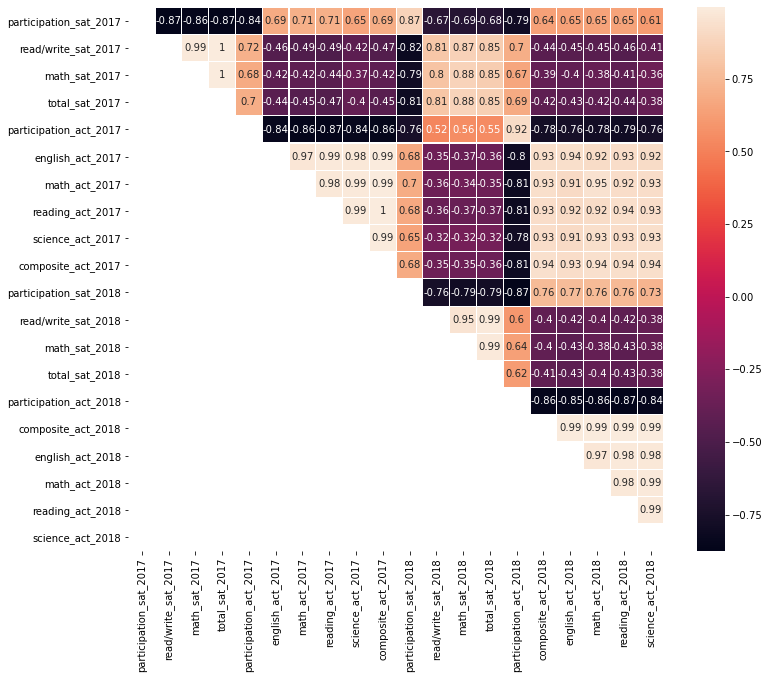

In [76]:
plt.figure(figsize=(12,10));

correlation = final.corr();

mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.tril_indices_from(mask)] = True

sns.heatmap(final.corr(),annot=True,linewidths=0.1,linecolor='white',mask=mask);

**Analysis:**
- The correlation confirmed has confirmed that the participation rate for both tests are inversely related. This is likely due to the fact that students are unlikely to take both tests as they will require significant preparation effort.
- It also can be deduced that participation rate and score are also inversely related. This is supported by predated paper on this topic in 2009 [source](https://www.sesp.northwestern.edu/docs/publications/942077931551ecbf3a0ac7.pdf). 

### Histogram

In [78]:
# create function to generate historgram
def subplot_histograms(dataframe, list_of_titles, list_of_xlabels=None,kde=False):
    nrows = int(np.ceil(len(list_of_titles)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2,figsize=(12,8), sharey = True) 
    ax = ax.ravel()
    df=pd.DataFrame()
    for i, column in enumerate(list_of_titles): 
        if 'participation' in column:
            df[column] = dataframe[column]*100
        else:
            df[column] = dataframe[column]
        if 'sat' in column:
            color = '#353535'
        elif 'act' in column:
            color = '#F46524'
        sns.histplot(data=df,x = column,kde=kde, line_kws={'color':color,'marker':'o'},
                     bins=20,ax=ax[i],color=color) 
        ax[i].set_title(column)
        ax[i].set_ylabel("Number of States")
        ax[i].set_xlabel("")
        mean_line = ax[i].axvline(df[column].mean(),color=color,ls='-')
        mean_line.set_label('Mean of: ' + column)
        ax[i].legend(loc='best')

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

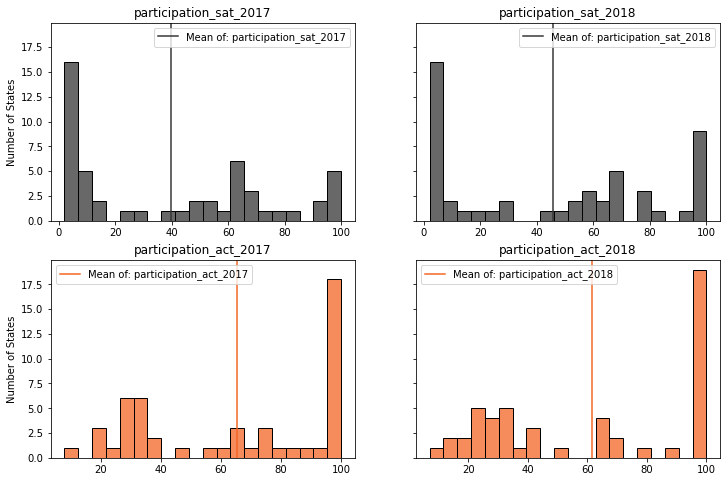

In [79]:
# Participation rates for SAT and ACT
list_of_titles = ['participation_sat_2017','participation_sat_2018','participation_act_2017','participation_act_2018']
subplot_histograms(final,list_of_titles)

**Participation Rate Trend**

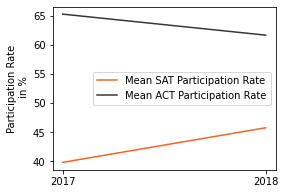

In [80]:
sat_2017_mean = final['participation_sat_2017'].mean()*100
sat_2018_mean = final['participation_sat_2018'].mean()*100
act_2017_mean = final['participation_act_2017'].mean()*100
act_2018_mean = final['participation_act_2018'].mean()*100

fig,ax = plt.subplots(figsize=(4,3))
ax.plot(['2017','2018'],[sat_2017_mean,sat_2018_mean],color='#F46524',label='Mean SAT Participation Rate')
ax.plot(['2017','2018'],[act_2017_mean,act_2018_mean],color='#353535',label='Mean ACT Participation Rate')
ax.set_ylabel('Participation Rate\n in %')

ax.legend(loc='best');

**Analysis:**
- There are still many states with very low SAT (less than 20%) participation rate. Although it slightly improves in 2018, SAT participation rate are still way behind ACT participation rate. 

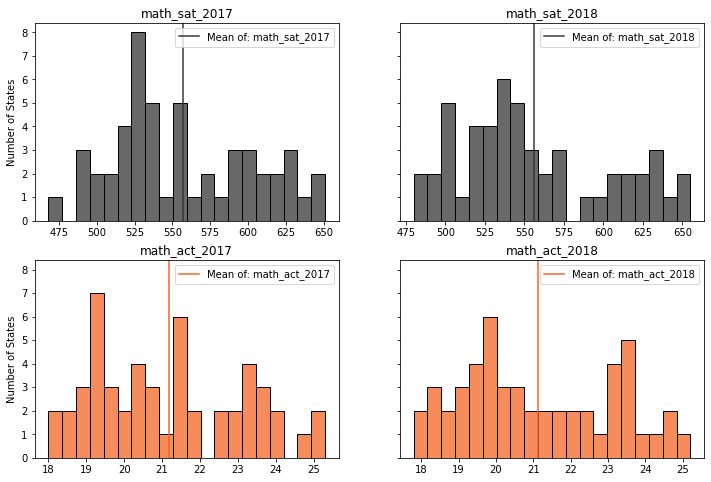

In [81]:
# Math scores for SAT and ACT
list_of_titles = ['math_sat_2017','math_sat_2018','math_act_2017','math_act_2018']
subplot_histograms(final,list_of_titles)

**Analysis:**
- There is no appreciable change in the mean of Math score for both test in both years.

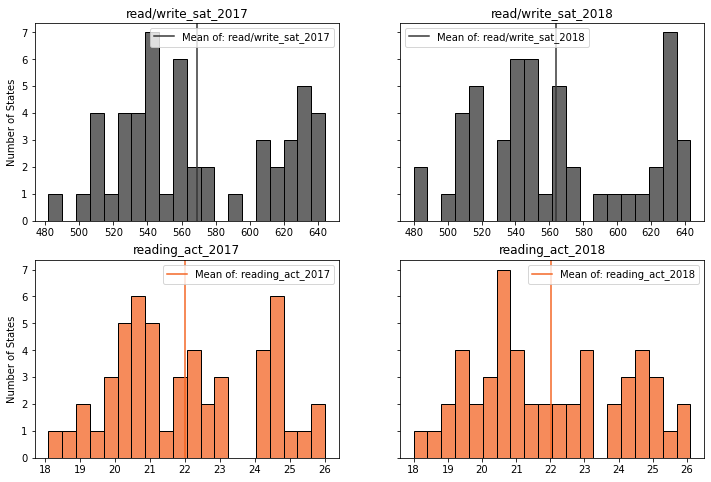

In [82]:
# Reading/verbal scores for SAT & ACT
list_of_titles = ['read/write_sat_2017','read/write_sat_2018','reading_act_2017','reading_act_2018']
subplot_histograms(final,list_of_titles)

**Analysis:**
- Likewise, there is also no appreciable change in the mean of reading on ACT test and read/write in SAT test in both years.

### Scatter Plot

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [83]:
# Do it in subplots manner so that we can compare. Alternatively, we can use Pairplot from seaborn.
def scatter_plotter(dataframe,list_of_columns,figsize,regplot=False):
    # list_of_columns is in list of list format, i.e. [['var_1','var_2'],['var_3','var_4'], ... ]
    nrows = int(np.ceil(len(list_of_columns)/2))
    if len(list_of_columns) == 1:
        ncols = 1
    else:
        ncols = 2
    fig, ax = plt.subplots(nrows=nrows,ncols=ncols, figsize=figsize)
    ax = ax.ravel()
    for i, column in enumerate(list_of_columns):            
        x = dataframe[column[0]]
        y = dataframe[column[1]]

        ax[i].scatter(
            x = x,
            y = y,
            alpha=0.7, 
            color ='#F46524'
        )
        
        ax[i].set_xlabel(column[0])
        ax[i].set_ylabel(column[1])
        ax[i].set_title("\n".join(wrap('Scatter plot of '+ column[0] + " againts " + column[1], 40)))
        plt.subplots_adjust(hspace=0.3)
        if regplot:
            sns.regplot(x=x,y=y,ax=ax[i], line_kws = {'color': '#F46524'},
                        scatter_kws = {'color':'#353535'})

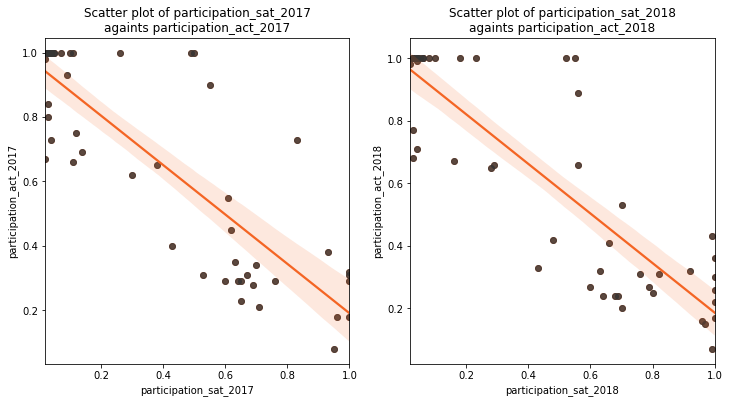

In [84]:
figsize = (12,6)
list_of_columns = [['participation_sat_2017','participation_act_2017'],
                   ['participation_sat_2018','participation_act_2018']
                  ]
scatter_plotter(final,list_of_columns,figsize,regplot=True)

**Analysis:**
- Participation rate for both test shows a clear sign of negative correlation. This may be due to the nature of students which takes one not the other which makes this almost a 'zero sum game'. 

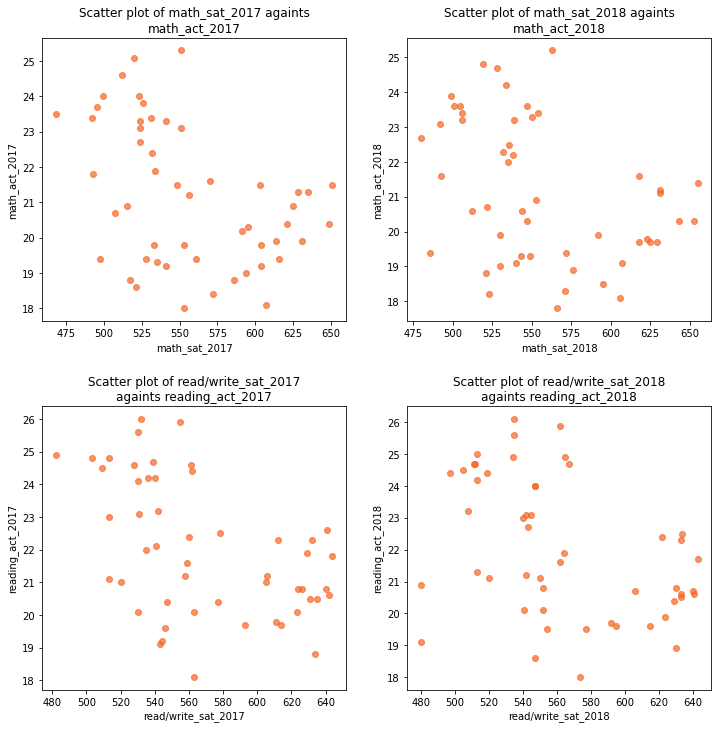

In [86]:
figsize = (12,12)
list_of_columns = [['math_sat_2017','math_act_2017'],
                   ['math_sat_2018','math_act_2018'],
                   ['read/write_sat_2017','reading_act_2017'],
                   ['read/write_sat_2018','reading_act_2018'],                 
                  ]
scatter_plotter(final,list_of_columns,figsize)

**Analysis:**
- There is little to no correlation between the result of comparable subject on ACT and SAT for each state. 

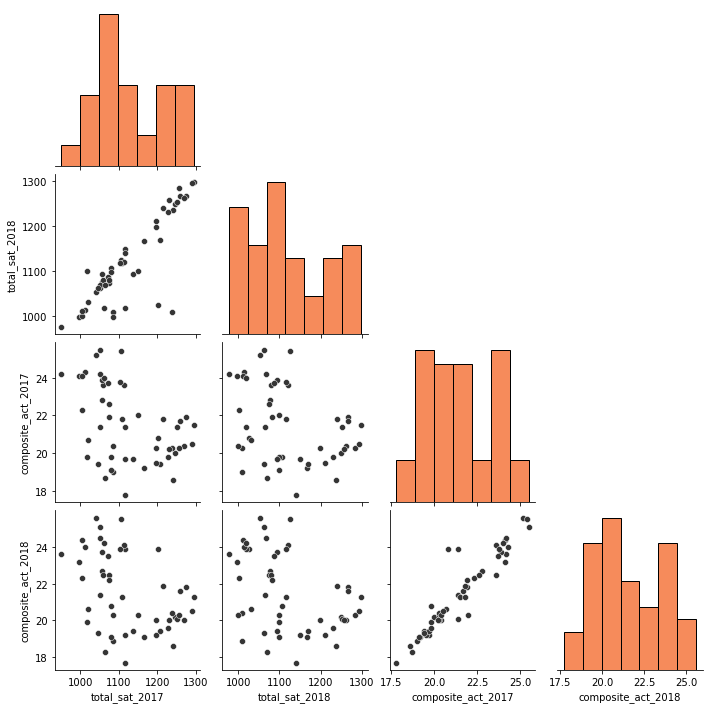

In [87]:
sns.pairplot(final[['total_sat_2017',
                    'total_sat_2018',
                    'composite_act_2017',
                    'composite_act_2018']],
             corner=True,
             diag_kws = {'color':'#F46524'},
            plot_kws = {'color':'#353535'});

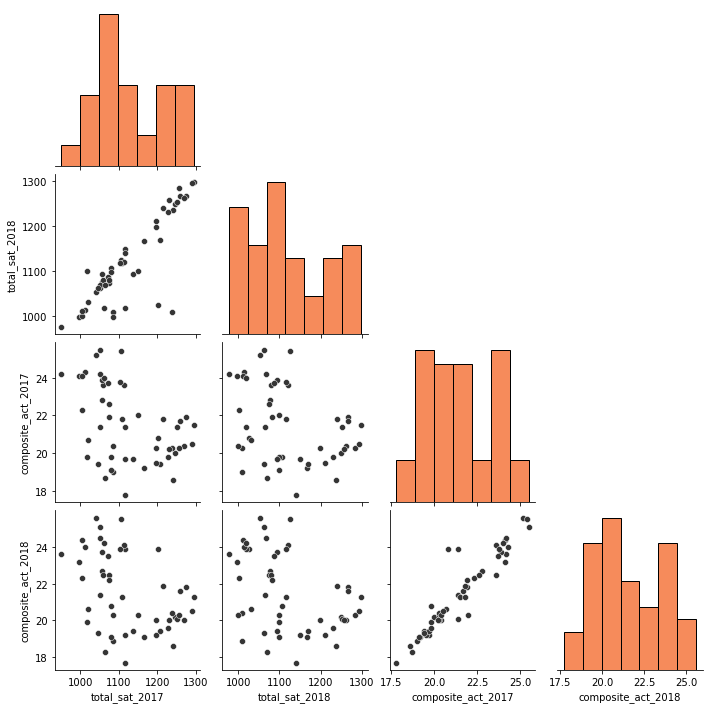

In [88]:
sns.pairplot(final[['total_sat_2017',
                    'total_sat_2018',
                    'composite_act_2017',
                    'composite_act_2018']],
             corner=True,
             diag_kws = {'color':'#F46524'},
            plot_kws = {'color':'#353535'});

**Analysis:**
- Similarly, there is no clear correlation between total SAT and composite ACT score. 
- However, there is a clear relation that state that has a good score on any test in 2017 will score relatively better in 2018 for the same test. This means, the overall score result for each state has been relatively consistent as long as relative score is concern for both tests. 
- Apparently, the same pattern is also shown in each of the individual subjects for both tests.

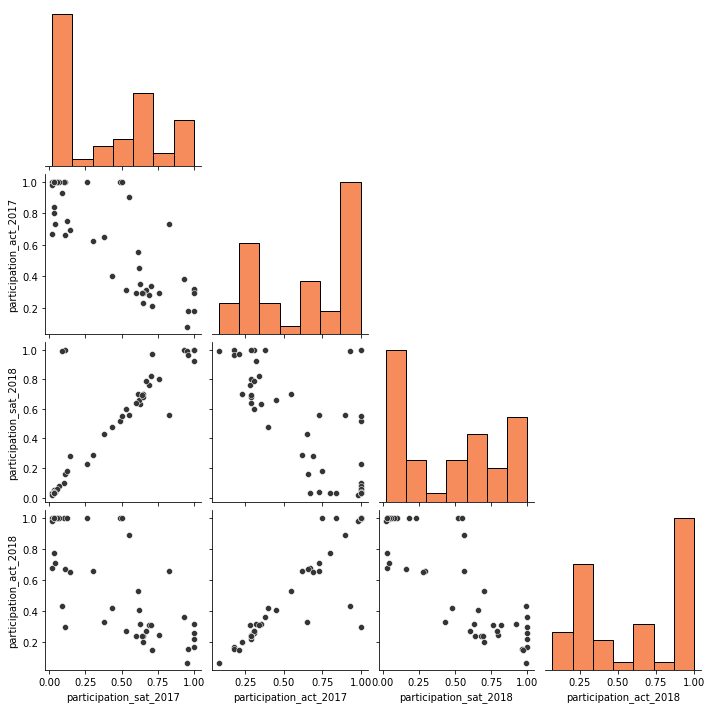

In [89]:
sns.pairplot(final[['participation_sat_2017',
                    'participation_act_2017',
                    'participation_sat_2018',
                    'participation_act_2018',]],
             corner=True,
             diag_kws = {'color':'#F46524'},
            plot_kws = {'color':'#353535'});

**Analysis:**
- The scatter plots of participation rate for both test in 2017 and 2018 further emphasizes that participation rate for each test is inversely related for each state.
- It is observed that there is inertia of participation rate on each state to prefer one test over another.

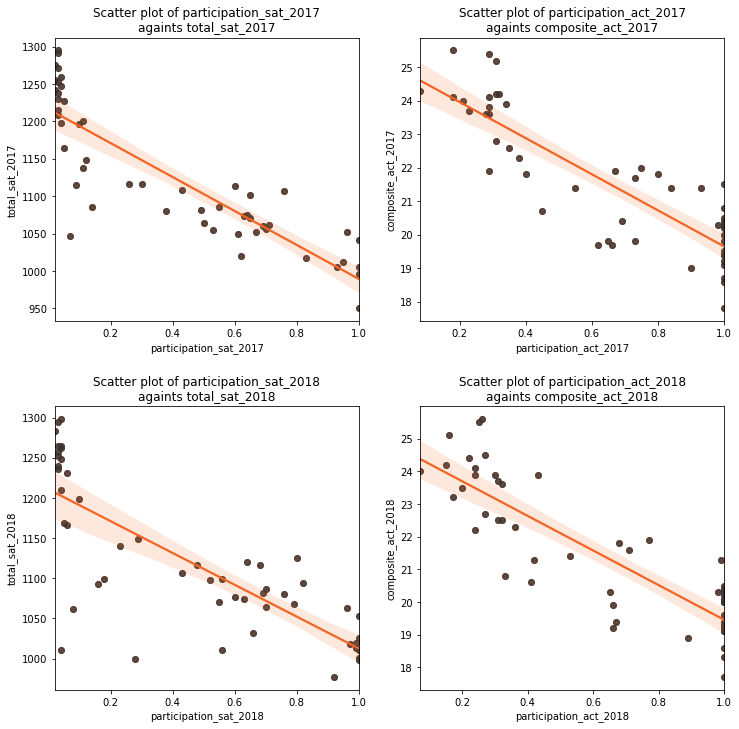

In [90]:
figsize = (12,12)
list_of_columns = [['participation_sat_2017','total_sat_2017'],
                   ['participation_act_2017','composite_act_2017'],
                   ['participation_sat_2018','total_sat_2018'],
                   ['participation_act_2018','composite_act_2018']              
                  ]
scatter_plotter(final,list_of_columns,figsize,regplot=True)

**Analysis:**
- Participation rate is inversely proportional to the overall score for both tests in 2017 and 2018.

### Boxplot

#### Plot and interpret boxplots

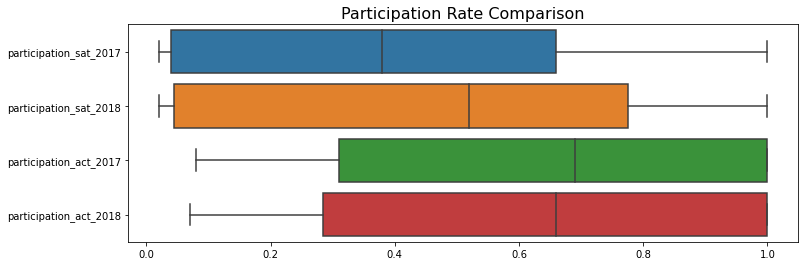

In [91]:
fig,ax = plt.subplots(figsize=(12,4))
sns.boxplot(data = final[['participation_sat_2017','participation_sat_2018'
                          ,'participation_act_2017','participation_act_2018']],
            orient = 'h',ax=ax).set_title('Participation Rate Comparison',fontsize=16);

**Analysis:**
- Participation rate for SAT is improving but still much lower than of ACT test.

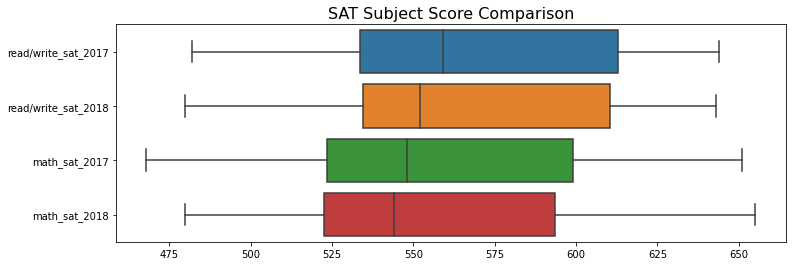

In [96]:
fig,ax = plt.subplots(figsize=(12,4))
sns.boxplot(data = final[['read/write_sat_2017','read/write_sat_2018',
                         'math_sat_2017','math_sat_2018']],
            orient = 'h',ax=ax).set_title('SAT Subject Score Comparison',fontsize=16);

**Analysis:**
- Generally, the subject score for SAT in 2018 has dropped from in 2017.

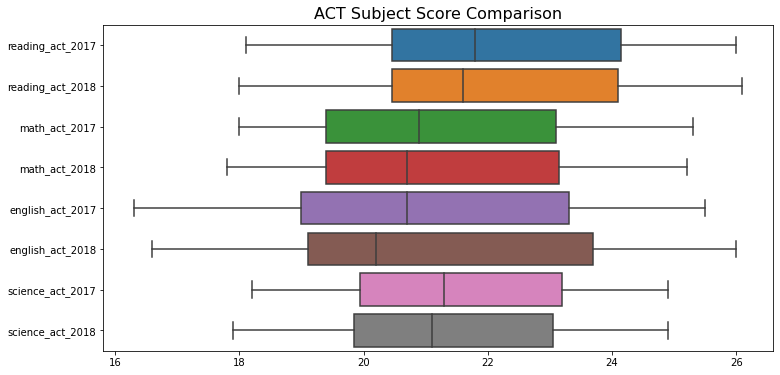

In [93]:
fig,ax = plt.subplots(figsize=(12,6))
sns.boxplot(data = final[['reading_act_2017','reading_act_2018',
                         'math_act_2017','math_act_2018',
                          'english_act_2017','english_act_2018',
                         'science_act_2017','science_act_2018']],
            orient = 'h',ax=ax).set_title('ACT Subject Score Comparison',fontsize=16);

**Analysis:**
- Similarly, the subject score for ACT in 2018 has dropped from in 2017.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

In this chapter, an explanation on how the data is distributed will be covered. The measure of central tendency, shape/ skewness and spread will be discussed

In [97]:
def kde_plotter(df,list_of_columns,legends, xlabels, titles):
    nrows = int(np.ceil(len(list_of_columns)/4))
    fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(20,6))
    ax = ax.ravel()
    for column in list_of_columns:
        if 'sat' in column:
            j = 0
        elif 'act' in column:
            j = 1
        
        if '2017' in column:
            color = '#F46524'
        elif '2018' in column:
            color = '#353535'
        
        sns.kdeplot(x=df[column],ax=ax[j], color = color)
        ax[j].legend(legends)
        ax[j].set_xlabel(xlabels[j], fontsize=12)
        ax[j].set_ylabel('Density', fontsize=12)
        ax[j].set_title(titles[j],fontsize=16)

In [98]:
def stats_printer(df,list_of_columns):
    skew = pd.DataFrame(df[list_of_columns].skew()).rename(columns={0:'skew'})
    describe = df[list_of_columns].describe().transpose()
    return describe.join(skew)

**Participation Rates**

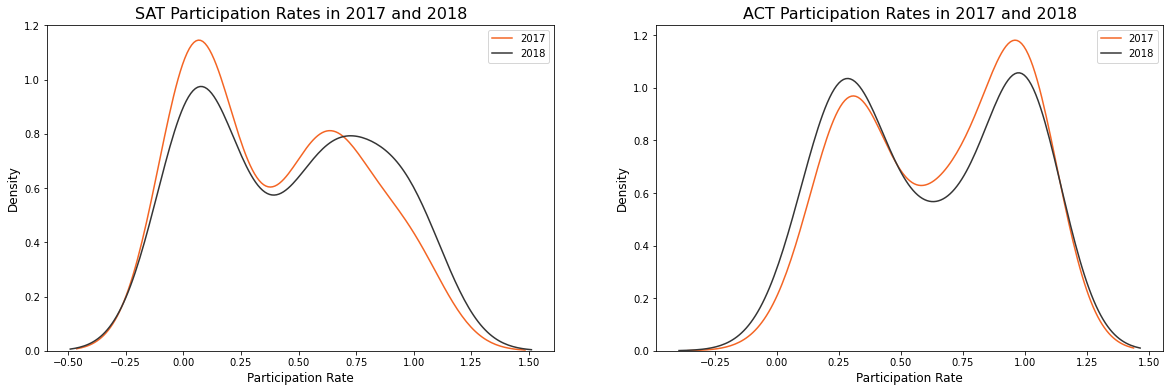

In [99]:
list_of_columns = ['participation_sat_2017','participation_sat_2018','participation_act_2017','participation_act_2018']
legends = ['2017','2018']
xlabels = ['Participation Rate','Participation Rate']
titles = ['SAT Participation Rates in 2017 and 2018', 'ACT Participation Rates in 2017 and 2018']
kde_plotter(final,list_of_columns, legends, xlabels, titles)

In [100]:
list_of_columns = ['participation_sat_2017','participation_sat_2018','participation_act_2017','participation_act_2018']
stats_printer(final,list_of_columns)

,count,mean,std,min,25%,50%,75%,max,skew
participation_sat_2017,51.0,0.398039,0.352766,0.02,0.040,0.38,0.660,1.0,0.346450
participation_sat_2018,51.0,0.457451,0.373143,0.02,0.045,0.52,0.775,1.0,0.136228
participation_act_2017,51.0,0.652549,0.321408,0.08,0.310,0.69,1.000,1.0,-0.197989
participation_act_2018,51.0,0.616471,0.340810,0.07,0.285,0.66,1.000,1.0,-0.021916


**Analysis**

|Measures|SAT Participation Rates|ACT Participation Rates|
|---|---|---|
|Central Tendency|The mean increases from 39.8 to 45.7 <br>while the median increases from 38 to 52|The mean decreases from 65.2 to 61.6 <br>while the median decreases from 69 to 66|
|Spread|The standard deviation increases from 35.3 to 37.3 <br>indicating more spread in the distribution|The standard deviation increases from 32.1 to 34.0 <br>indicating more spread in the distribution|
|Shape/ Skewness|Bimodal with positive skew. <br>The skewness decreases in 2018. |Bimodal with negative skew. <br>The skewness decreases in 2018|

**Total Scores**

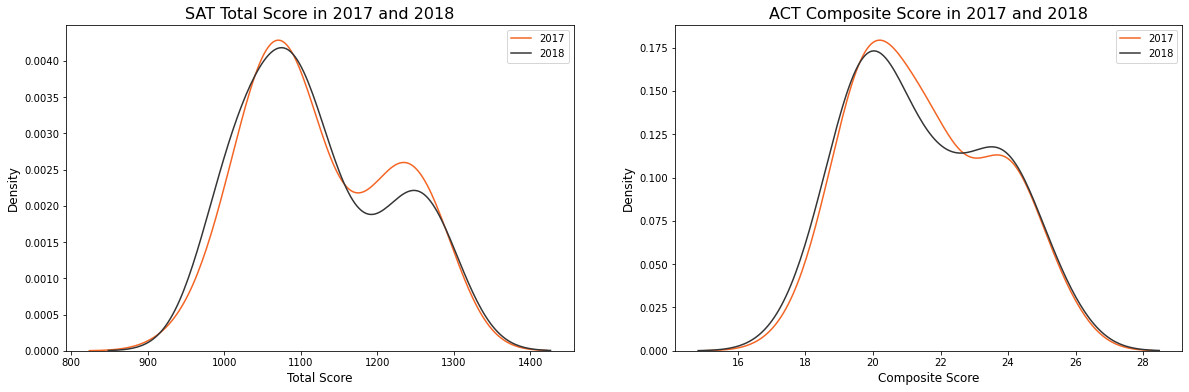

In [101]:
list_of_columns = ['total_sat_2017','total_sat_2018','composite_act_2017','composite_act_2018']
legends = ['2017','2018']
xlabels = ['Total Score', 'Composite Score']
titles = ['SAT Total Score in 2017 and 2018', 'ACT Composite Score in 2017 and 2018']
kde_plotter(final,list_of_columns, legends, xlabels, titles)

In [102]:
list_of_columns = ['total_sat_2017','total_sat_2018','composite_act_2017','composite_act_2018']
stats_printer(final,list_of_columns)

,count,mean,std,min,25%,50%,75%,max,skew
total_sat_2017,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0,0.310903
total_sat_2018,51.0,1120.019608,94.155083,977.0,1057.50,1098.0,1204.00,1298.0,0.466432
composite_act_2017,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5,0.319810
composite_act_2018,51.0,21.486275,2.106278,17.7,19.95,21.3,23.55,25.6,0.281962


**Analysis**

|Measures|SAT Total Scores|ACT Composite Scores|
|---|---|---|
|Central Tendency|The mean decreases from 1126 to 1120 <br>while the median decreases from 1107 to 1098|The mean decreases slightly from 21.5 to 21.4 <br>while the median decreases slightly from 21.4 to 21.3|
|Spread|The standard deviation increases from 92.5 to 94.1 <br>indicating more spread in the distribution|The standard deviation increases slightly from 2.0 to 2.1 <br>indicating slight increass in spread in the distribution|
|Shape/ Skewness|Bimodal with positive skew. <br>The skewness decreases in 2018. |Bimodal with positive skew. <br>The skewness decreases in 2018|

**Math Scores**

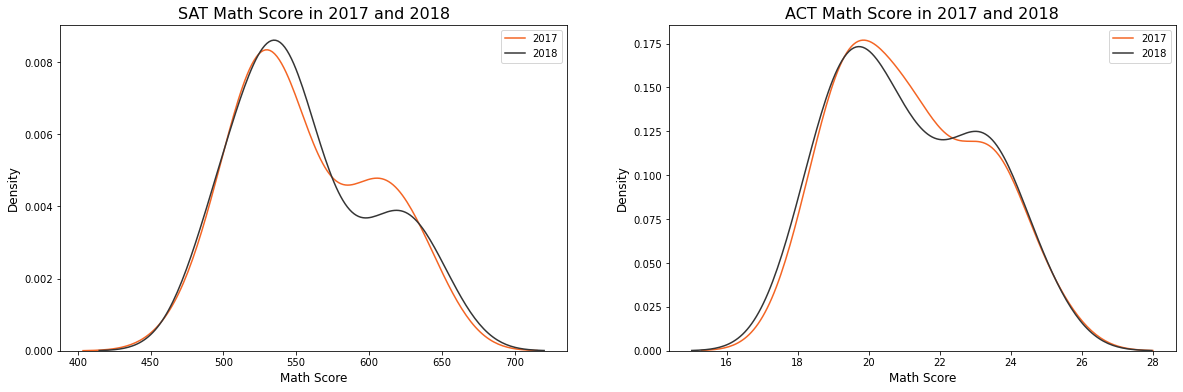

In [103]:
list_of_columns = ['math_sat_2017','math_sat_2018','math_act_2017','math_act_2018']
legends = ['2017','2018']
xlabels = ['Math Score', 'Math Score']
titles = ['SAT Math Score in 2017 and 2018', 'ACT Math Score in 2017 and 2018']
kde_plotter(final,list_of_columns, legends, xlabels, titles)

In [104]:
list_of_columns = ['math_sat_2017','math_sat_2018','math_act_2017','math_act_2018']
stats_printer(final,list_of_columns)

,count,mean,std,min,25%,50%,75%,max,skew
math_sat_2017,51.0,556.882353,47.121395,468.0,523.5,548.0,599.00,651.0,0.365040
math_sat_2018,51.0,556.235294,47.772623,480.0,522.5,544.0,593.50,655.0,0.530407
math_act_2017,51.0,21.182353,1.981989,18.0,19.4,20.9,23.10,25.3,0.332683
math_act_2018,51.0,21.125490,2.035765,17.8,19.4,20.7,23.15,25.2,0.269548


**Analysis**

|Measures|SAT Math Scores|ACT Math Scores|
|---|---|---|
|Central Tendency|The mean is relatively unchanged at 556 <br>while the median decreases from 599 to 593|The mean and median are relatively unchanged at 21.1 and 25.3, respectively|
|Spread|The standard deviation is also relatively unchanged|The standard deviation increases slightly from 1.98 to 2.03 <br>indicating slight increass in spread in the distribution|
|Shape/ Skewness|Bimodal with positive skew. <br>The skewness increases in 2018. |Bimodal with positive skew. <br>The skewness decreases in 2018|

**Reading Scores**

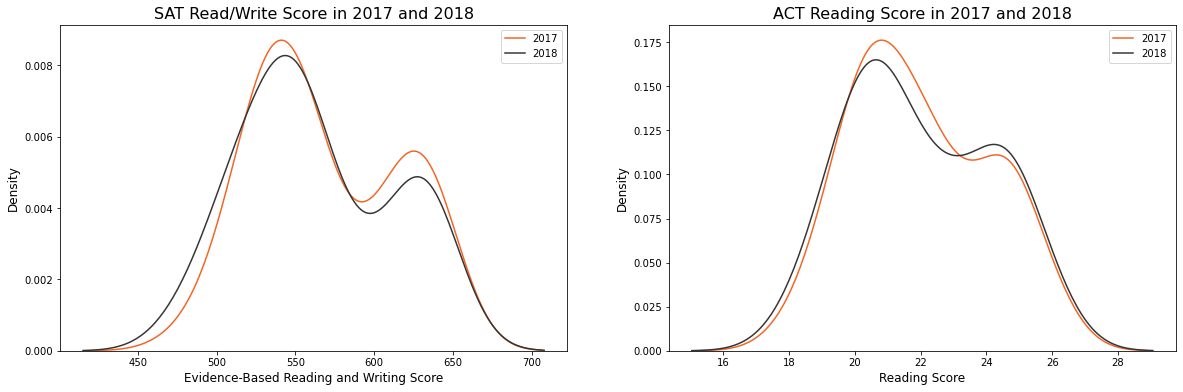

In [105]:
list_of_columns = ['read/write_sat_2017','read/write_sat_2018','reading_act_2017','reading_act_2018']
legends = ['2017','2018']
xlabels = ['Evidence-Based Reading and Writing Score', 'Reading Score']
titles = ['SAT Read/Write Score in 2017 and 2018', 'ACT Reading Score in 2017 and 2018']
kde_plotter(final,list_of_columns, legends, xlabels, titles)

In [106]:
list_of_columns = ['read/write_sat_2017','read/write_sat_2018','reading_act_2017','reading_act_2018']
stats_printer(final,list_of_columns)

,count,mean,std,min,25%,50%,75%,max,skew
read/write_sat_2017,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0,0.272693
read/write_sat_2018,51.0,563.686275,47.502627,480.0,534.50,552.0,610.50,643.0,0.282300
reading_act_2017,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0,0.269366
reading_act_2018,51.0,22.015686,2.167245,18.0,20.45,21.6,24.10,26.1,0.201361


**Analysis**

|Measures|SAT Total Scores|ACT Composite Scores|
|---|---|---|
|Central Tendency|The mean decreases from 569 to 563 <br>while the median decreases from 613 to 610|The mean and median are relatively unchanged at 22.0 and 21.7, respectively|
|Spread|The standard deviation increases from 45.7 to 47.5 <br>indicating more spread in the distribution|The standard deviation increases slightly from 2.1 to 2.2 <br>indicating slight increass in spread in the distribution|
|Shape/ Skewness|Bimodal with positive skew. <br>The skewness increases in 2018. |Bimodal with positive skew. <br>The skewness decreases in 2018|

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer:
Normal distribution is not observed in Math score, Reading score and participation rate data. Instead, the distribution observed shows bimodal pattern where there is a high frequency of data at both extreme of the data, especially on participation rates. 

Central Limit Theorem assumptions:
- Data points needs to be of **mean/ median of samples** taken from a population **randomly** with **replacement** [(source)](https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_probability/BS704_Probability12.html#:~:text=The%20central%20limit%20theorem%20states,will%20be%20approximately%20normally%20distributed.)
 - In this example, the 51 data points we have is the average data of each state with some biases **(not random)** such as different state regulations, education standards, average social-economic status, etc. 
 - Most probably, the data is collected **without replacement**
- To ensure CLT holds, however, we need to collect random samples (consisting more than 30 students each [(source)](https://www.investopedia.com/terms/c/central_limit_theorem.asp#:~:text=Key%20Takeaways-,The%20central%20limit%20theorem%20(CLT)%20states%20that%20the%20distribution%20of,for%20the%20CLT%20to%20hold.)) from the entire population (US high school graduates) with replacement, and take centrality (mean/ median) of the samples. These computed mean/ median will eventually follow normal distribution.

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

As our data is not taken with the approach according to CLT assumption, it will not follow normality. Therefore, we should avoid taking inferences based on the normality assumptions of the data such as deriving national test score or participation rate mean and standard deviation based on CLT. Instead, the only way to obtain mean and standard deviation is by obtaining the weightage of students counts each states and compute national stats mathematically (with the assumption that states data provided either covers all student in the state or follows CLT).

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

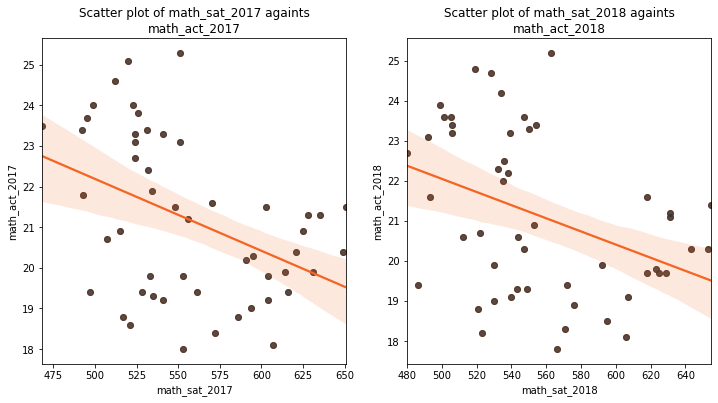

In [107]:
figsize = (12,6)
list_of_columns = [['math_sat_2017','math_act_2017'],
                   ['math_sat_2018','math_act_2018'],               
                  ]
scatter_plotter(final,list_of_columns,figsize,regplot=True)

**Analysis**

Solely based on the statistics, we may seem there is a negative correlation between math score for both tests. However, it is likely to be a correlation than a causation. This pattern may be better explain by the indirect correlation between:
- Scores for both tests are negatively correlated with their participation rates
- Participation rate for both test are negatively correlated with each other within the same states

However, we are still unable to meaningfully deduced if one test is better/ harder than the other. Specifically on math scores, SAT and ACT both test different aspects on Math proficiencies [(source)](https://blog.collegevine.com/difference-sat-act-math/). Therefore, we should not compare the score between these tests.

#### Statistical Evaluation of Distributions 

I have a postulation that participation rate of one test or another is not only related to the state-regulation but also socio-economic status of the states. This chapter will try to investigate on this.

In [108]:
# Import GDP data

GDP = pd.read_csv('../data/US_GDP_2017.csv')
GDP['2017'] = GDP.apply(lambda x: float(x['2017']),axis=1) # convert GDP data to float

GDP.rename(columns={
    'GeoName':'state',
    '2017':'gdp_2017'
},inplace=True);
GDP.set_index('state',inplace=True) # rename the columns

In [109]:
# function to categorize state socio-economic status based on its GDP
def gdp_category(gdp):
    if gdp<86_000:
        return 'Bottom 25%'
    elif gdp<200_000:
        return 'Bottom 50%'
    elif gdp<460_000:
        return 'Top 50%'
    else:
        return 'Top 25%'

In [110]:
GDP['category'] = GDP.apply(lambda x: gdp_category(x['gdp_2017']),axis=1) # apply the categorizing function

In [111]:
final.set_index('state',inplace=True); # set 'state' as index to be merged with GDP
final = final.join(GDP) # merge data

In [112]:
# Reset the index after we merge the data into its final state
final.reset_index(inplace=True)
final.head()

,state,participation_sat_2017,read/write_sat_2017,math_sat_2017,total_sat_2017,participation_act_2017,english_act_2017,math_act_2017,reading_act_2017,science_act_2017,...,total_sat_2018,participation_act_2018,composite_act_2018,english_act_2018,math_act_2018,reading_act_2018,science_act_2018,test_requirement,gdp_2017,category
0,Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,...,1166,1.00,19.1,18.9,18.3,19.6,19.0,ACT required,193693.0,Bottom 50%
1,Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,...,1106,0.33,20.8,19.8,20.6,21.6,20.7,No state requirement,52825.9,Bottom 25%
2,Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,...,1149,0.66,19.2,18.2,19.4,19.5,19.2,No state requirement,302117.8,Top 50%
3,Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,...,1169,1.00,19.4,19.1,18.9,19.7,19.4,No state requirement,114950.7,Bottom 50%
4,California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,...,1076,0.27,22.7,22.5,22.5,23.0,22.1,No state requirement,2628314.6,Top 25%


Let's try to plot a scatter plot if there is any patter in how the participation for both tests spread across different GDP per capita levels.

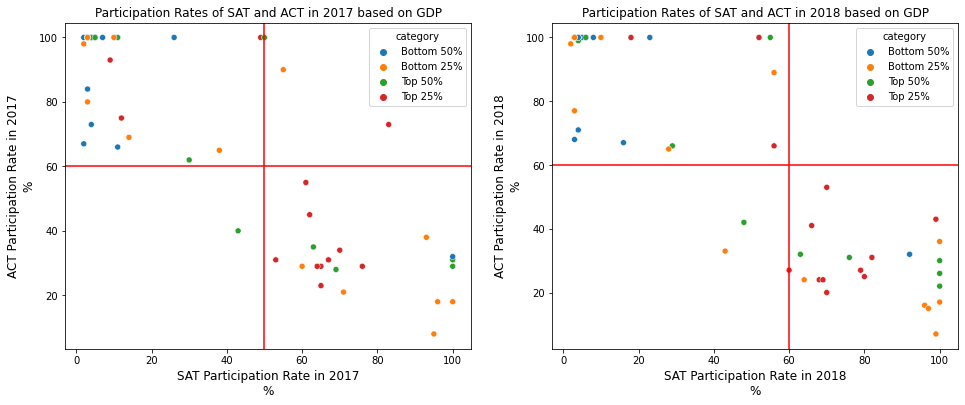

In [113]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(16,6))
sns.scatterplot(y = final['participation_act_2017']*100, 
                x = final['participation_sat_2017']*100,
                hue=final['category'],ax=ax[0]);
ax[0].set_title('Participation Rates of SAT and ACT in 2017 based on GDP')
ax[0].set_xlabel('SAT Participation Rate in 2017\n%',fontsize=12)
ax[0].set_ylabel('ACT Participation Rate in 2017\n%',fontsize=12)
ax[0].axhline(y=60, color='r', linestyle='-')
ax[0].axvline(x=50, color='r', linestyle='-')

sns.scatterplot(y = final['participation_act_2018']*100, x = final['participation_sat_2018']*100,hue=final['category'],ax=ax[1]);
ax[1].set_title('Participation Rates of SAT and ACT in 2018 based on GDP')
ax[1].set_xlabel('SAT Participation Rate in 2018\n%',fontsize=12)
ax[1].set_ylabel('ACT Participation Rate in 2018\n%',fontsize=12)
ax[1].axhline(y=60, color='r', linestyle='-')
ax[1].axvline(x=60, color='r', linestyle='-');

## Assuming there is no significant difference between income in 2017 and 2018

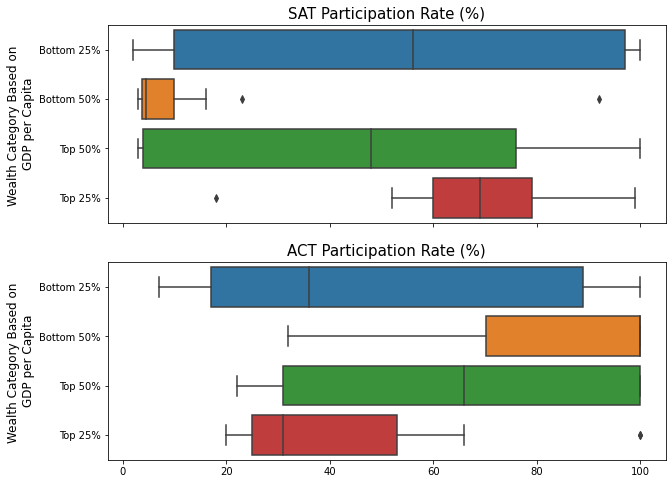

In [114]:
fig, ax = plt.subplots(nrows=2, ncols=1,figsize=(10,8),sharex=True)
# x = final[final['test_requirement'] == "No state requirement"]
sns.boxplot(y=final['category'],x=final['participation_sat_2018']*100,ax=ax[0],
           order=['Bottom 25%','Bottom 50%', 'Top 50%', 'Top 25%'])
ax[0].set_title("SAT Participation Rate (%)",fontsize=15)
ax[0].set_xlabel('')
ax[0].set_ylabel('Wealth Category Based on \nGDP per Capita', fontsize=12)

sns.boxplot(y=final['category'],x=final['participation_act_2018']*100,ax=ax[1],
           order=['Bottom 25%','Bottom 50%', 'Top 50%', 'Top 25%'])
ax[1].set_title("ACT Participation Rate (%)",fontsize=15)
ax[1].set_xlabel('')
ax[1].set_ylabel('Wealth Category Based on \nGDP per Capita', fontsize=12);

**Analysis:**
- As we can see, there is certain effect of GDP to the spread of participation rate for both test. We can further verify this with performing hypothesis testing.  

What if we see the effect of state requirement into the equation

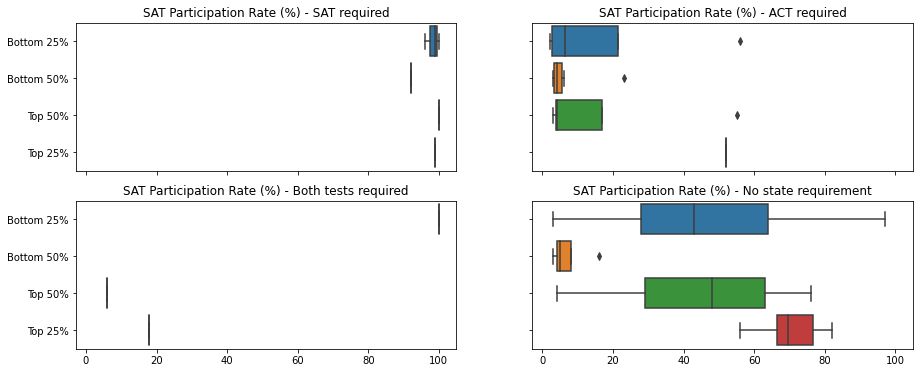

In [118]:
fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(15,6),sharex=True,sharey=True)
ax = ax.ravel()
test_reqs = ['SAT required', 'ACT required', 'Both tests required', 'No state requirement']
for i, test_req in enumerate(test_reqs):
    x = final[final['test_requirement'] == test_req]['participation_sat_2018']
    sns.boxplot(y=final['category'],x=x*100,ax=ax[i],
               order=['Bottom 25%','Bottom 50%', 'Top 50%', 'Top 25%'])
    ax[i].set_title("SAT Participation Rate (%) - " + test_req,fontsize=12)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')

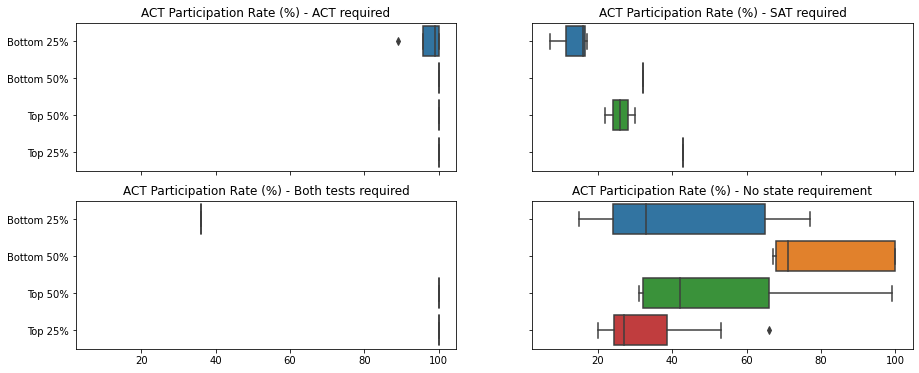

In [119]:
fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(15,6),sharex=True,sharey=True)
ax = ax.ravel()
test_reqs = ['ACT required', 'SAT required', 'Both tests required', 'No state requirement']
for i, test_req in enumerate(test_reqs):
    x = final[final['test_requirement'] == test_req]['participation_act_2018']
    sns.boxplot(y=final['category'],x=x*100,ax=ax[i],
               order=['Bottom 25%','Bottom 50%', 'Top 50%', 'Top 25%'])
    ax[i].set_title("ACT Participation Rate (%) - " + test_req,fontsize=12)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')

**Analysis:**
<ol><li>For states with only SAT requirement, SAT is the preferred choice regardless the wealth status.
<li>For states with both SAT and ACT requirement, SAT is only preferred when state is less affluent.
<li>For states with ACT requirement, SAT is significantly less popular if state is not at  the Top 25%.
<li>When there is no state requirement, SAT is significantly less popular especially within the Bottom 50% bracket

#### Hypothesis Testing
1. Set up null hypothesis<br>
   Ho: There is no relation between socio-economic status of the states to test preference
   <br>Ha: (alternative hypothesis) There is some relation between socio-economic status of the states to test preference
   <br><br>Divide each state according to their preferred tests.

In [120]:
# Only consider state which shows definite preference on one test or another
def sorting(part_sat_2017, part_sat_2018, part_act_2017, part_act_2018):
    upper_limit = 0.5
    lower_limit = 0.5
    if (part_sat_2017>lower_limit) & (part_sat_2018>lower_limit)\
    & (part_act_2017<upper_limit) & (part_act_2018<upper_limit):
        return 'sat'
    elif (part_act_2017>lower_limit) & (part_act_2018>lower_limit)\
    & (part_sat_2017<upper_limit) & (part_sat_2018<upper_limit):
        return 'act'
    else:
        return 'no preference'

In [121]:
final['preferred_test'] = final.apply(lambda x: sorting(x['participation_sat_2017'],x['participation_sat_2018'],\
                                    x['participation_act_2017'],x['participation_act_2018']),axis=1)

In [122]:
sat = final.loc[final['preferred_test']=='sat','gdp_2017']
act = final.loc[final['preferred_test']=='act','gdp_2017']

2. Construct level of significance (alpha) as 5%
3. Calculate test statistics and find p-value

In [123]:
stats.ttest_ind(sat,act,equal_var = False) 

Ttest_indResult(statistic=2.2755689365143184, pvalue=0.034590081621640005)

**Analyisis:**<br>p-value is found to be 3% which is lower than 5%. Therefore, there is sufficient evidence to reject the null hypothesis and to accept the alternative hypothesis. Therefore, there is a relation between socio-economic status and test preferred by the states. 

**Some Extra Plots**

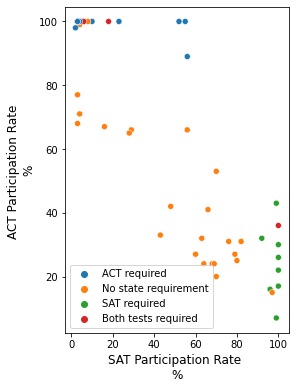

In [129]:
# State Requirement
fig, ax = plt.subplots(figsize=(4,6))
sns.scatterplot(x = final['participation_sat_2018']*100,
                y = final['participation_act_2018']*100,
                hue=final['test_requirement'],ax=ax)
ax.set_xlabel('SAT Participation Rate \n%',fontsize=12)
ax.set_ylabel('ACT Participation Rate \n%',fontsize=12)
plt.legend(loc='best');

**Analysis:**
- It can be clearly seen that state requirement affects the choice in test

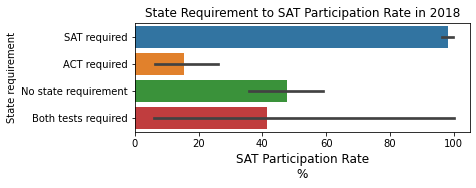

In [130]:
fig, ax = plt.subplots(figsize=(6,2))
x = final['participation_sat_2018']*100
y = final['test_requirement']
sns.barplot(x=x, y=y, ax=ax,orient='h',
            order=['SAT required','ACT required','No state requirement','Both tests required'])
ax.set_ylabel('State requirement')
ax.set_xlabel('SAT Participation Rate\n%',fontsize=12)
ax.set_title('State Requirement to SAT Participation Rate in 2018');

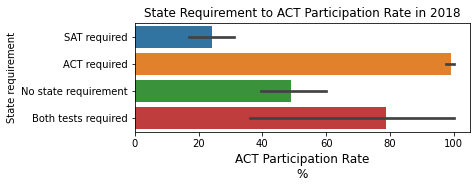

In [131]:
fig, ax = plt.subplots(figsize=(6,2))
x = final['participation_act_2018']*100
y = final['test_requirement']
sns.barplot(x=x, y=y, ax=ax,orient='h',
            order=['SAT required','ACT required','No state requirement','Both tests required'])
ax.set_ylabel('State requirement')
ax.set_xlabel('ACT Participation Rate\n%',fontsize=12)
ax.set_title('State Requirement to ACT Participation Rate in 2018');

**Analysis:**
- There is a huge spread in participation rate for states with both tests being the requirement.

**Geographic Plot**

Using tableau, participation rates in 2018 are presented in a geographical form. SAT participation rate is shown in blue map while ACT participation is in red ([source](https://public.tableau.com/shared/3ZKTF8C35?:display_count=y&:origin=viz_share_link)). 

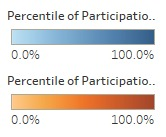

In [132]:
from IPython.display import Image
Image("../data/Map_scale.jpeg")

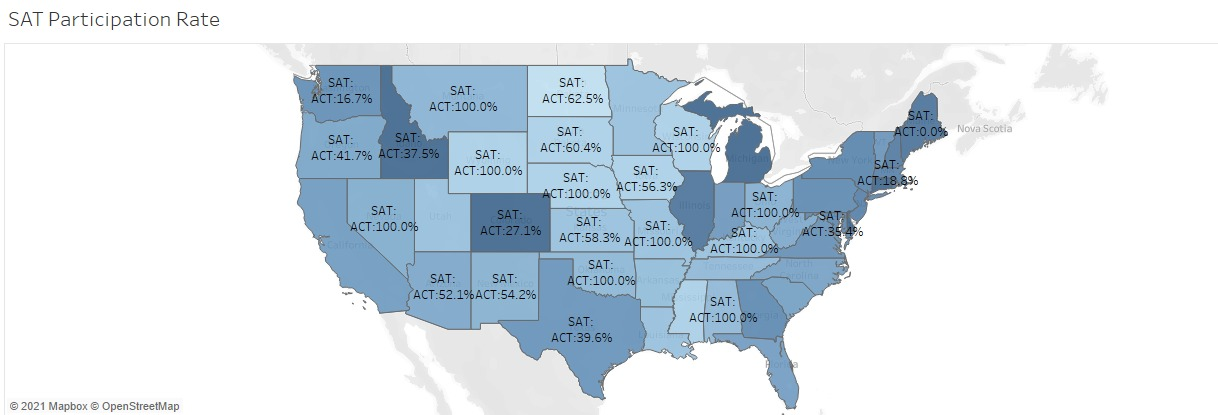

In [133]:
Image("../data/Map_SAT_PR.jpeg")

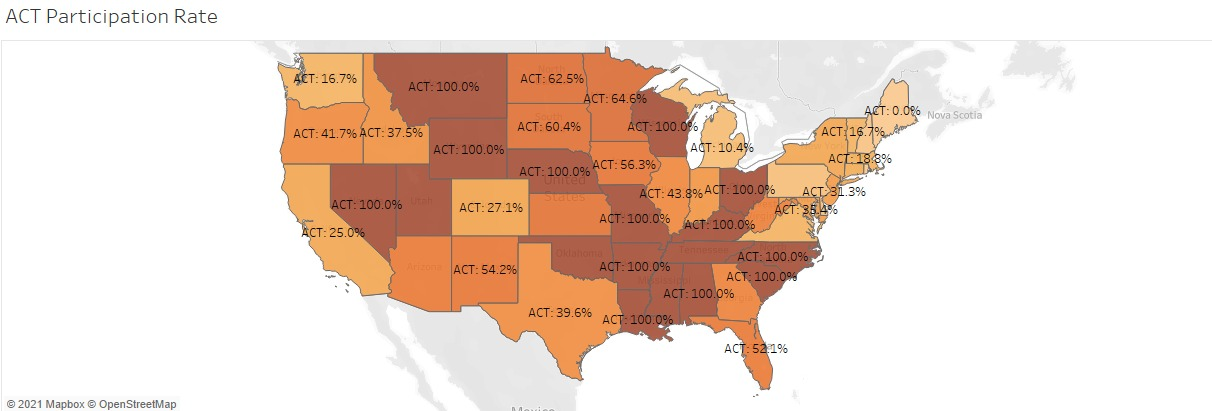

In [134]:
Image("../data/Map_ACT_PR.jpeg")

**Analysis:**
- Coastal states have the tendency to prefer SAT than ACT while further inwards to the heart of the continent, ACT is more prevalent. 
- It is once again highlighted that a state prefers one test over the other.

## Outside Research

In [135]:
final['change_part_sat'] = final.apply(lambda x: (x['participation_sat_2018']-x['participation_sat_2017'])*100, axis=1)
final['change_part_act'] = final.apply(lambda x: (x['participation_act_2018']-x['participation_act_2017'])*100, axis=1)

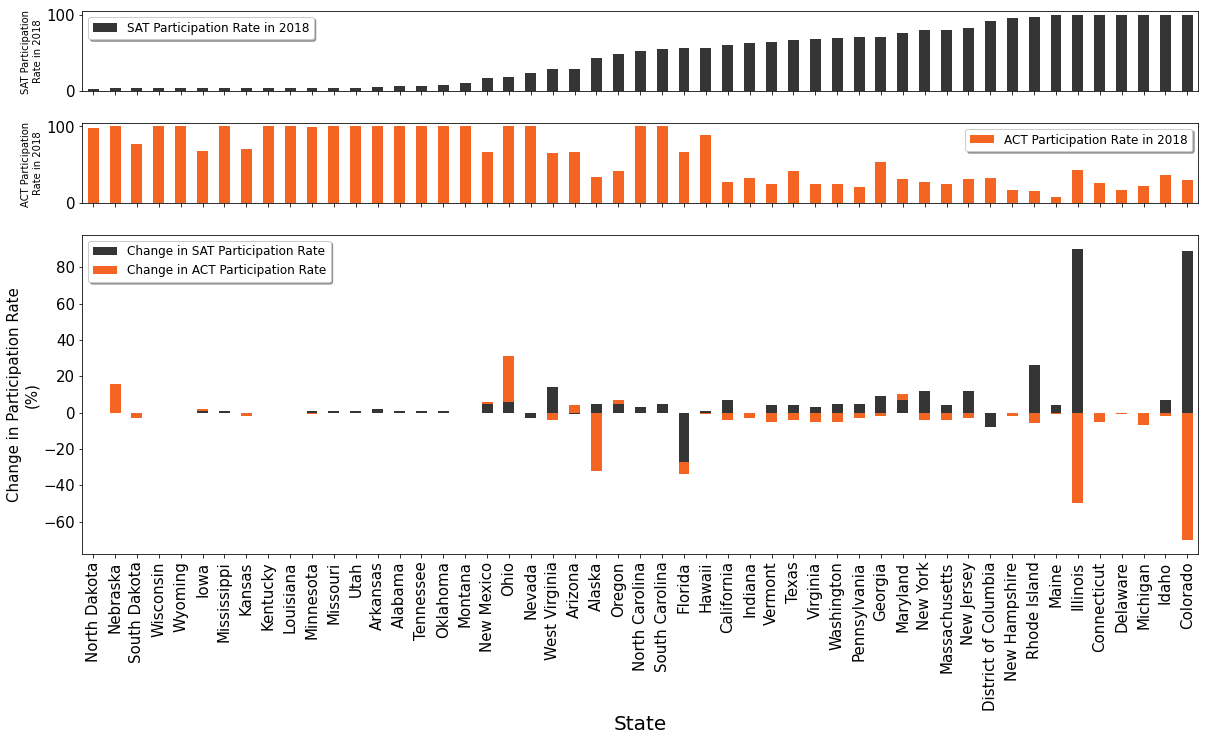

In [136]:
df = final.sort_values(['participation_sat_2018','change_part_sat'\
                        ])[['state','change_part_sat','change_part_act',
                            'participation_act_2018','participation_sat_2018']]
df['participation_sat_2018'] = df.apply(lambda x: x['participation_sat_2018']*100,axis=1)
df['participation_act_2018'] = df.apply(lambda x: x['participation_act_2018']*100,axis=1)
fig, ax = plt.subplots(nrows=3,ncols=1,figsize=(20,10),sharex=True, gridspec_kw={'height_ratios': [1,1,4]})
ax=ax.ravel()
df[['state','participation_sat_2018']].plot(x='state',kind='bar',ax=ax[0],color='#353535')
ax[0].legend(['SAT Participation Rate in 2018'], loc='best', shadow=True, fontsize=12)
ax[0].set_ylabel("SAT Participation \nRate in 2018",fontsize=10)
ax[0].tick_params(axis='both', which='major', labelsize=15)

df[['state','participation_act_2018']].plot(x='state',kind='bar',ax=ax[1],color='#F46524')
ax[1].legend(['ACT Participation Rate in 2018'], loc='best', shadow=True, fontsize=12)
ax[1].set_ylabel("ACT Participation \nRate in 2018",fontsize=10)
ax[1].tick_params(axis='both', which='major', labelsize=15)

df[['state','change_part_sat','change_part_act']].plot(x='state',
                                                       kind='bar',
                                                       ax=ax[2],
                                                       stacked = True,
                                                      color = ['#353535','#F46524'])
ax[2].legend(['Change in SAT Participation Rate','Change in ACT Participation Rate'], 
          loc='upper left', shadow=True, fontsize=12)
ax[2].set_ylabel("Change in Participation Rate\n(%)",fontsize=15)
ax[2].tick_params(axis='both', which='major', labelsize=15)
ax[2].set_xlabel('State',fontsize=20);

**Summary from External Research**
In general, SAT participation rates has improves year-on-year for most states while the opposite is true for ACT. This may likely mean the change in SAT format in 2016 has successfully entice more students to take the test. 

On another note, states regulations still plays a significant role in determining participation rates of the tests. Colorado and Illinois for example, experienced a drastic increase in SAT participation rate in 2018 ([source](https://blog.prepscholar.com/which-states-require-the-sat), [source](https://chicago.chalkbeat.org/2018/7/27/21105418/illinois-has-embraced-the-sat-and-the-act-is-mad-about-it)) as state-administered SAT test is rolled out. Interesting to note, however, for state which administered both tests, participation rates in ACT is significantly higher such as in Ohio and Tennessee. This phenomenon may be explained by the admission criteria of popular university in the state which favours one test over the other. Take University of Ohio, for example, which allows student to submit only the highest ACT score they obtained from multiple tests while they need to send all SAT scores they have ever taken [(source)](https://www.prepscholar.com/sat/s/colleges/Ohio-University-admission-requirements).

Based on the high negative correlation between participation rate of both tests, it can be deduced that students tends to focus on one test over the other based on popularity within the states [(source)](collegeraptor.com/getting-in/articles/act-sat/preference-act-sat-state-infographic/). On another note, participation rate is also negatively correlated to the test score. This phenomenon may be attributed to selection bias within the state as data may only reflect students from higher socio-economic class or more academically inclined which may afford to prepare and take test less popular in their state. 

Finally, socio-economic landscape of the state, being viewed from GDP per capita point of view has some correlation to the test participation rate. It is also noted that geographical area of the state matters in terms of test preference as coastal area tends to have a higher SAT participation rate while landlocked states usually prefers ACT tests.


### Conclusions and Recommendations

As observed earlier, state regulation plays a significant role in dictating the choice of test a state would choose. For example, Colorado and Illinois saw a huge bump in SAT popularity due to state-wide regulation for all students to take SAT for free and therefore, removes a possible barrier for college admission. Similar approach can be done in other states starting from state with lower GDP (bottom 50%) as the students may have higher sensitivity to cost. For example, the state of New Mexico has a relatively low SAT participation rate in 2018 (18%) and lower GDP per capita. This is compounded by the high [gini coefficient](https://www.statista.com/statistics/227249/greatest-gap-between-rich-and-poor-by-us-state/) (degree of inequality) within the state which may signal a high sensitivity to cost. 

However, a handshake with the official will not suffice especially. For 2021 admission year, many universities have waived the requirement to take SAT or ACT as a standard of admission due to the extra difficulty for students to prepare and sit on the test. Therefore, College Board needs to redefine standardised test to not only act as a fair hurdle for everyone to participate in tertiary education, but also to prepare them for the university. Finally, SAT delivery format needs to be readjusted to be more accessible for students especially during the time of pandemic.

### Additional Data

Moving forward, more data to dig in to complete the analysis:
- The spread of ACT/SAT preference relating to political preference
- The spread of ACT/SAT preference relating to gini coefficient
- University admission requirement per state

## Combined Data Dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|final|The state where the data is from| 
|participation_sat_2017|float|final|Participation rate within the state (given in decimal ranging between 0-1)<br> < 0 corresponds to no participation and 1 corresponds to total participation >| 
|read/write_sat_2017|int|final|Average Reading and Writing subject score between 200-800 (given as integers) <br> < higher value corresponds to better result >| 
|math_sat_2017|int|final|Average Math subject score between 200-800 (given as integers) <br> < higher value corresponds to better result >|| 
|total_sat_2017|int|final|Total score between 400-1600 (given as integers) <br> < higher value corresponds to better result >|| 
|state|object|final|The state where the data is from| 
|participation_act_2017|float|final|Participation rate within the state (given in decimal ranging between 0-1)<br> < 0 corresponds to no participation and 1 corresponds to total participation >| 
|english_act_2017|float|final|Average English subject score between 1-36 (given as decimals) <br> < higher value corresponds to better result >| 
|math_act_2017|float|final|Average Math subject score between 1-36 (given as decimals) <br> < higher value corresponds to better result >| 
|reading_act_2017|float|final|Average Reading subject score between 1-36 (given as decimals) <br> < higher value corresponds to better result >| 
|science_act_2017|float|final|Average Science subject score between 1-36 (given as decimals) <br> < higher value corresponds to better result >| 
|composite_act_2017|float|final|Average score of all subjects, ranging between 1-36 (given as decimals) <br> < higher value corresponds to better result >| 
|test_requirement|string|final|If the state administer any test: <br> 'SAT required': for states which administer SAT <br> 'ACT required': for states which administer ACT <br> 'Both tests required': for states which administer both tests <br> 'No test required': for states which does not administer any tests|
|gdp_2017|float|final|GDP per capita for the states in 2017 ($)|
|category|string|final|Category of GDP per capita divided into 4 classes: <br> 'Top_25%' consists of 13 states <br> 'Top_50%' consists of 12 states <br> 'Bottom_50%' consists of 13 states <br> 'Bottom_25%' consists of 13 states|
|change_part_sat|float|final|Absolute change of participation rate for SAT in 2017 to 2018|
|change_part_act|float|final|Absolute change of participation rate for ACT in 2017 to 2018|
